## <span style='color:blue'> IMDB Movies Dataset EDA and ML Modelling</span>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [138]:
df = pd.read_csv("/content/drive/MyDrive/imdb-movies.csv")

#### <span style='color:darkgreen'> Getting basic information about the dataset</span>

In [139]:
df.shape

(10866, 22)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [141]:
# Getting First 5 rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,Unnamed: 16,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,09-06-2015,NaN,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,13-05-2015,NaN,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,18-03-2015,NaN,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,15-12-2015,NaN,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,01-04-2015,NaN,2947,7.3,2015,174799923.1,1.385749e+09


In [142]:
# Geeting info on the mean,std,quartiles,max values of each column.
df.describe()

,id,popularity,budget,revenue,runtime,Unnamed: 16,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,0.0,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,NaN,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,NaN,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,NaN,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,NaN,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,NaN,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,NaN,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,NaN,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data cleaning

In [143]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,Unnamed: 16,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,20-03-2010,NaN,110,5.0,2010,30000000.0,967000.0


In [144]:
df.drop_duplicates(inplace=True)
df[df.duplicated()]
# We get there are no duplicated entries now in the dataframe.

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,Unnamed: 16,vote_count,vote_average,release_year,budget_adj,revenue_adj


#### Null Data values

In [146]:
df.isnull().sum()

id                          0
imdb_id                    10
popularity                  0
budget                      0
revenue                     0
original_title              0
cast                       76
homepage                 7929
director                   44
tagline                  2824
keywords                 1493
overview                    4
runtime                     0
genres                     23
production_companies     1030
release_date                0
Unnamed: 16             10865
vote_count                  0
vote_average                0
release_year                0
budget_adj                  0
revenue_adj                 0
dtype: int64

In [147]:
df.dropna(subset = ['imdb_id','cast','director','genres','overview'], inplace=True)

#replace NaN values in 'keywords' and 'production_companies' columns with 'none'
df[['keywords', 'production_companies']] = df[['keywords', 'production_companies']].fillna('Not Known')

# Remove column number '7' ,'9' and 16'
df = df.drop(['homepage','tagline' ,'Unnamed: 16'],axis = 1) #  homepage and blank column, not needed for the analysis

# convert the 'Date' column to datetime format
df['release_date']= pd.to_datetime(df['release_date'])

df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10724 entries, 0 to 10865
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10724 non-null  int64         
 1   imdb_id               10724 non-null  object        
 2   popularity            10724 non-null  float64       
 3   budget                10724 non-null  int64         
 4   revenue               10724 non-null  int64         
 5   original_title        10724 non-null  object        
 6   cast                  10724 non-null  object        
 7   director              10724 non-null  object        
 8   keywords              10724 non-null  object        
 9   overview              10724 non-null  object        
 10  runtime               10724 non-null  int64         
 11  genres                10724 non-null  object        
 12  production_companies  10724 non-null  object        
 13  release_date    

### Data visualization & getting conclusions

In [14]:
import matplotlib
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Graph of Runtime vs Number_of_Votes

Text(0.5, 1.0, 'Runtime VS No. of Votes')

Text(0.5, 0, 'Runtime')

Text(0, 0.5, 'No. of Votes')

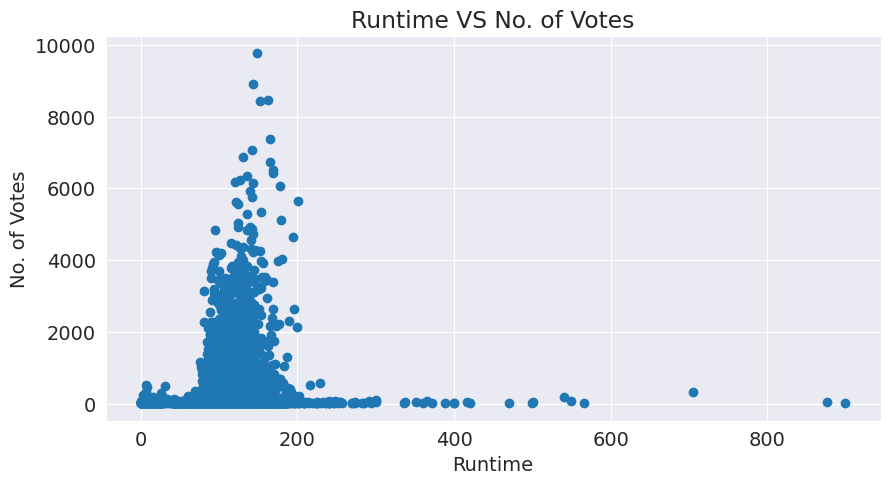

In [15]:
plt.scatter(df['runtime'],df['vote_count'])
plt.title('Runtime VS No. of Votes')
plt.xlabel('Runtime')
plt.ylabel('No. of Votes')

#### Graph of Runtime vs Popularity

Text(0.5, 1.0, 'Runtime VS Popularity')

Text(0.5, 0, 'Runtime')

Text(0, 0.5, 'Popularity')

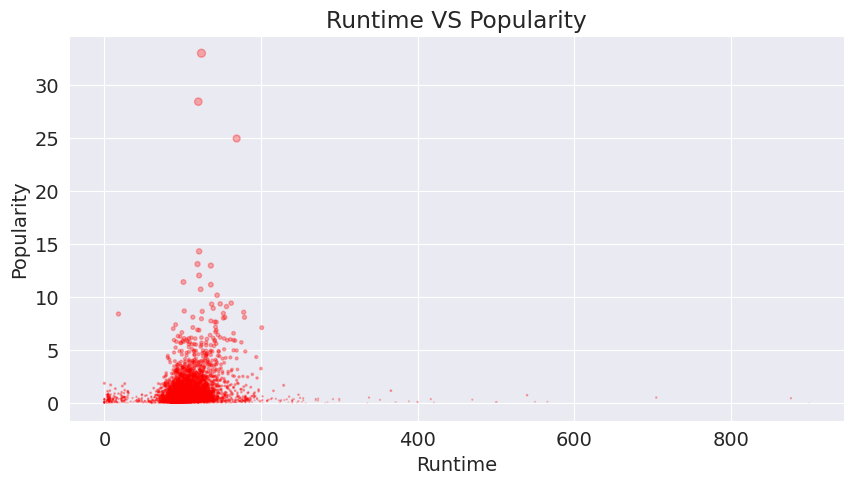

In [16]:
plt.scatter(df['runtime'],df['popularity'],color='red',s=df['popularity'],alpha=0.3)
plt.title('Runtime VS Popularity')
plt.xlabel('Runtime')
plt.ylabel('Popularity')



According to this scatter plot we can conclude that:

    1. Movies with runtime between 0 to 200 gets higher Popularity score
    2. Movies having higher runtime has very low Popularity Score.


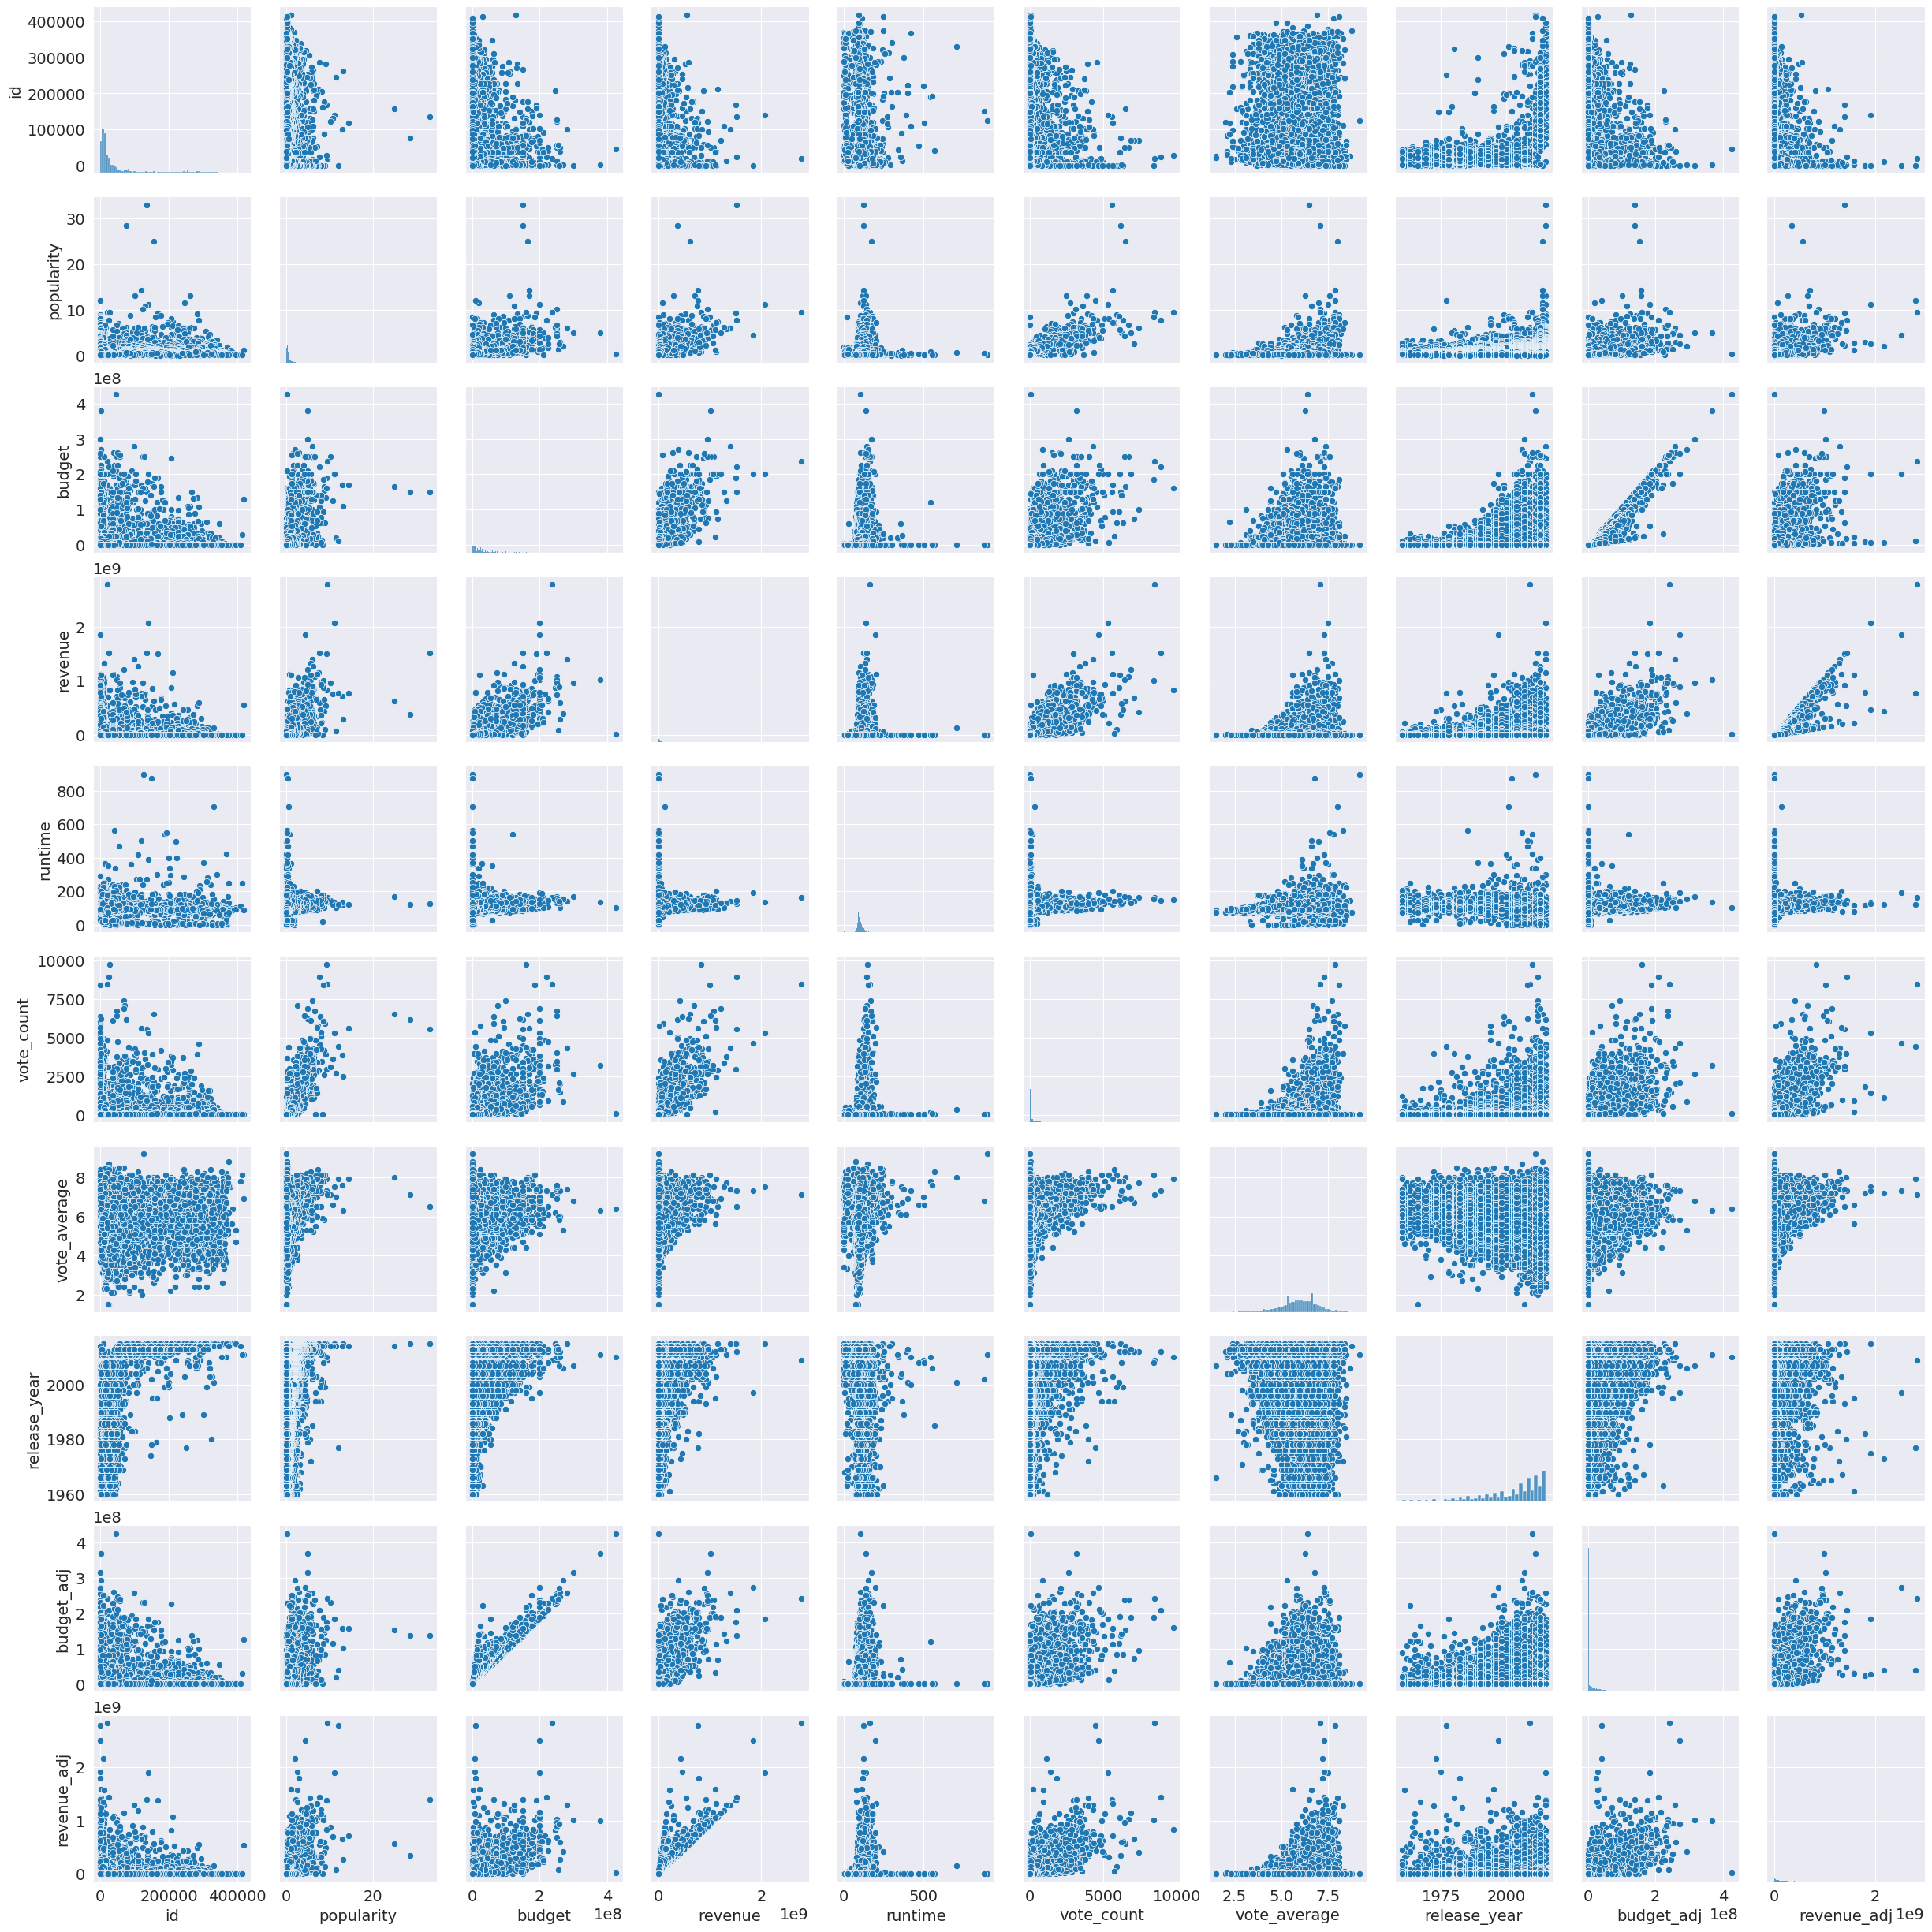

In [17]:
sns.pairplot(df)

#### Correlation of Movies Features

<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'Correlation of Movie Features\n')

<ipython-input-18-f8d2f20165ba>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap= "YlGnBu")


<Axes: title={'center': 'Correlation of Movie Features\n'}>

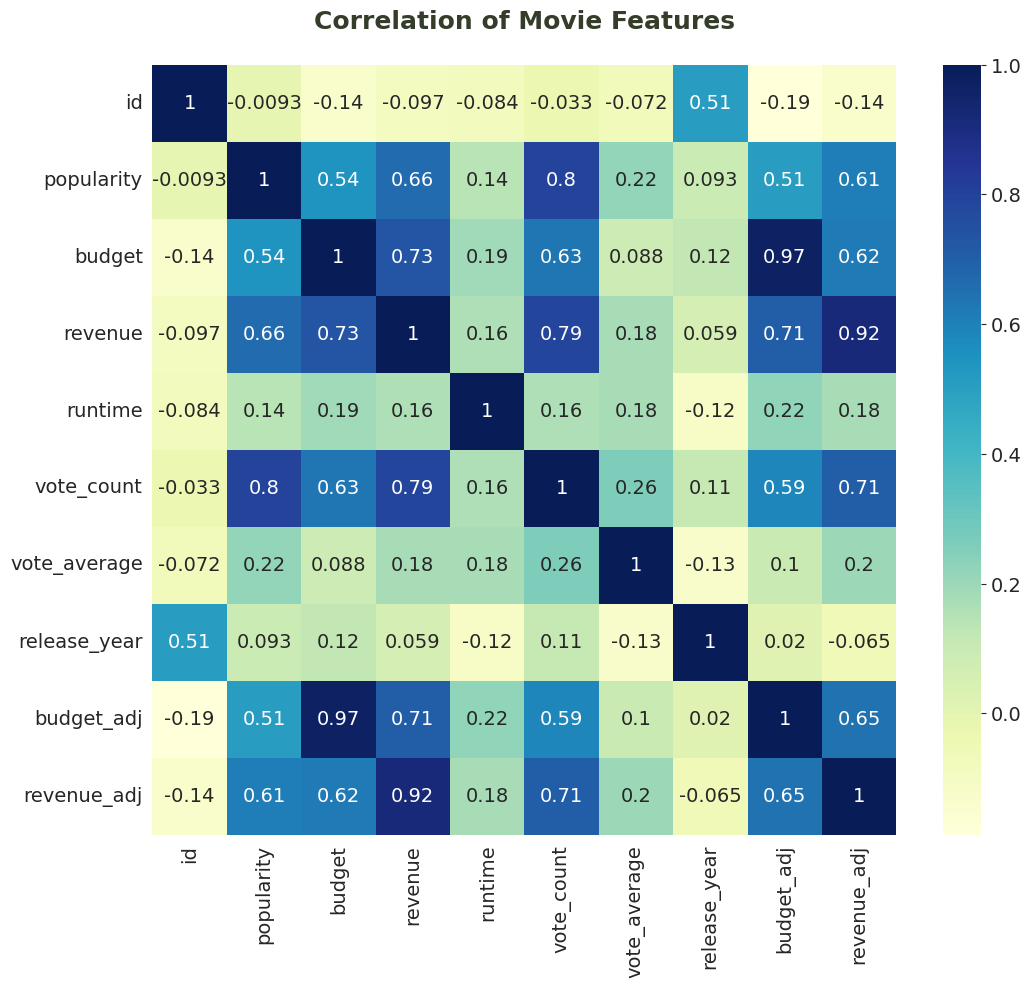

In [18]:
# Correlation of Movies Features
plt.figure(figsize=(12,10))
plt.title('Correlation of Movie Features\n', fontsize=18, weight=600, color='#333d29')
sns.heatmap(df.corr(), annot=True, cmap= "YlGnBu")



#### Year wise movie count by graph


<Figure size 2000x1000 with 0 Axes>

<Axes: xlabel='release_year', ylabel='count'>

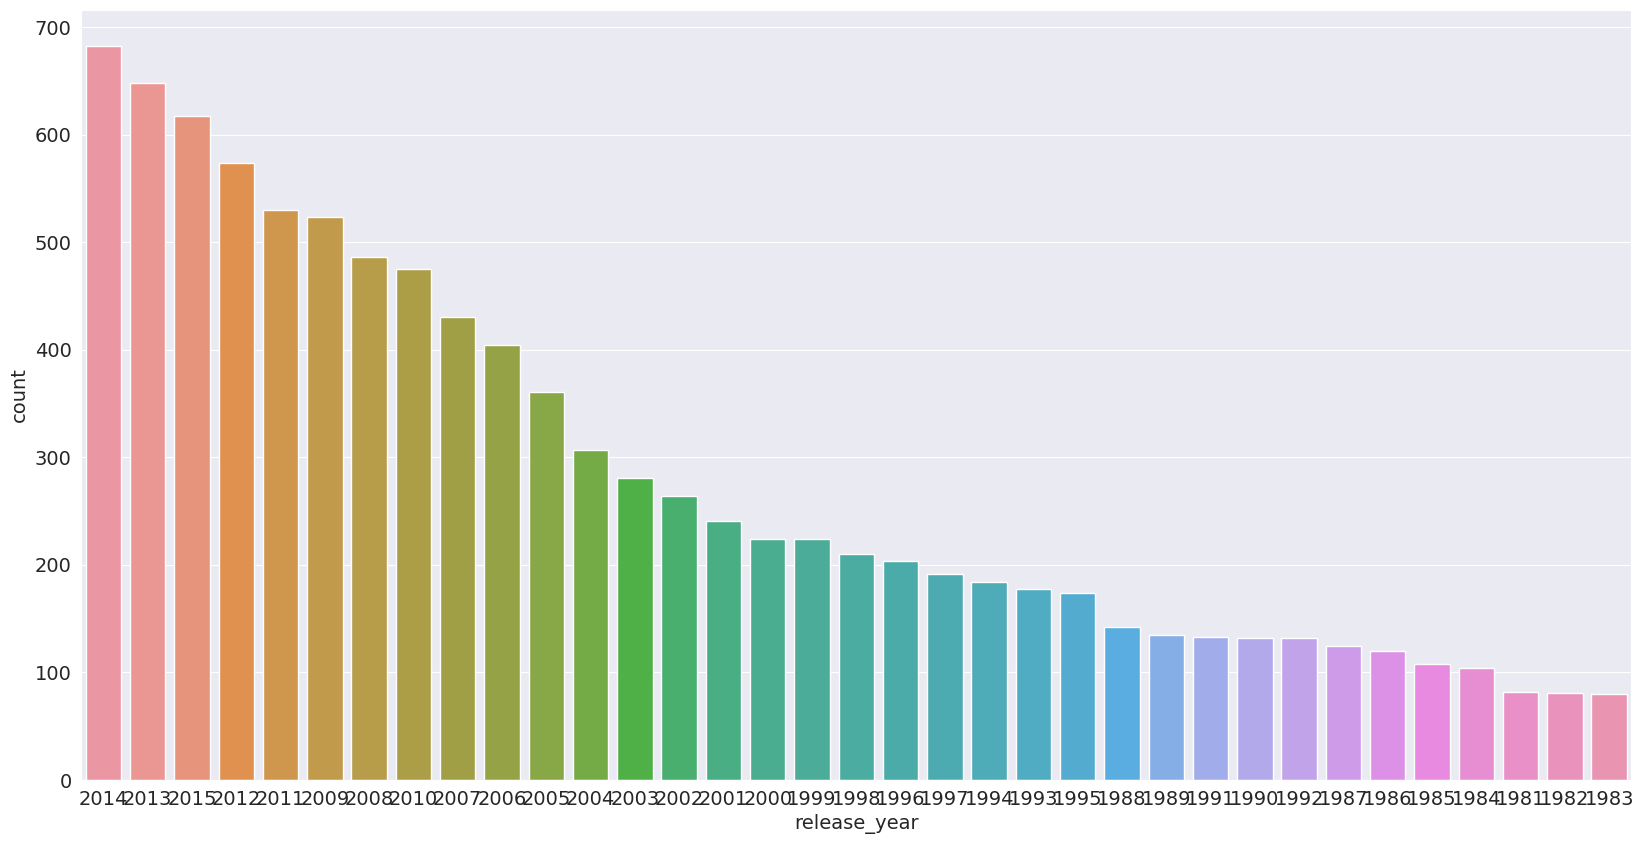

In [19]:
plt.figure(figsize=(20,10))
#df.info()
sns.countplot(x='release_year',data=df, order=df['release_year'].value_counts().index[0:35])

#### Number of movies each director created

director
Woody Allen                  45
Clint Eastwood               34
Steven Spielberg             29
Martin Scorsese              28
Ridley Scott                 23
                             ..
James Hill                    1
James Honeyborne              1
James Kent                    1
James Komack                  1
Ã€lex Pastor|David Pastor     1
Name: original_title, Length: 5014, dtype: int64

<Axes: title={'center': 'Count of Movies by each Director'}, xlabel='director'>

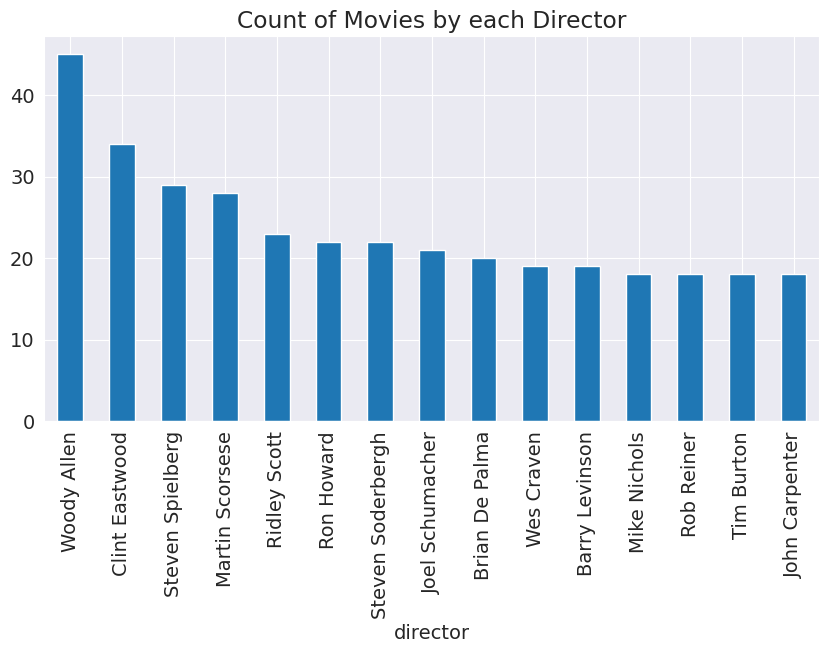

In [20]:
df_d =  df.groupby('director')['original_title'].count().sort_values(ascending=False)
df_d

# Plotting graph for only top 15 directors
df_d[0:15].plot(kind = "bar", title = "Count of Movies by each Director")


#### Number of movies by their genres

genres
Drama                           710
Comedy                          706
Drama|Romance                   289
Comedy|Drama                    280
Documentary                     274
                               ... 
Drama|Crime|TV Movie              1
Drama|Crime|Mystery|Comedy        1
Drama|Crime|Music                 1
Drama|Comedy|Western|Romance      1
Western|Thriller                  1
Name: original_title, Length: 2020, dtype: int64

<Axes: title={'center': 'Count of Movies by their genres'}, xlabel='genres'>

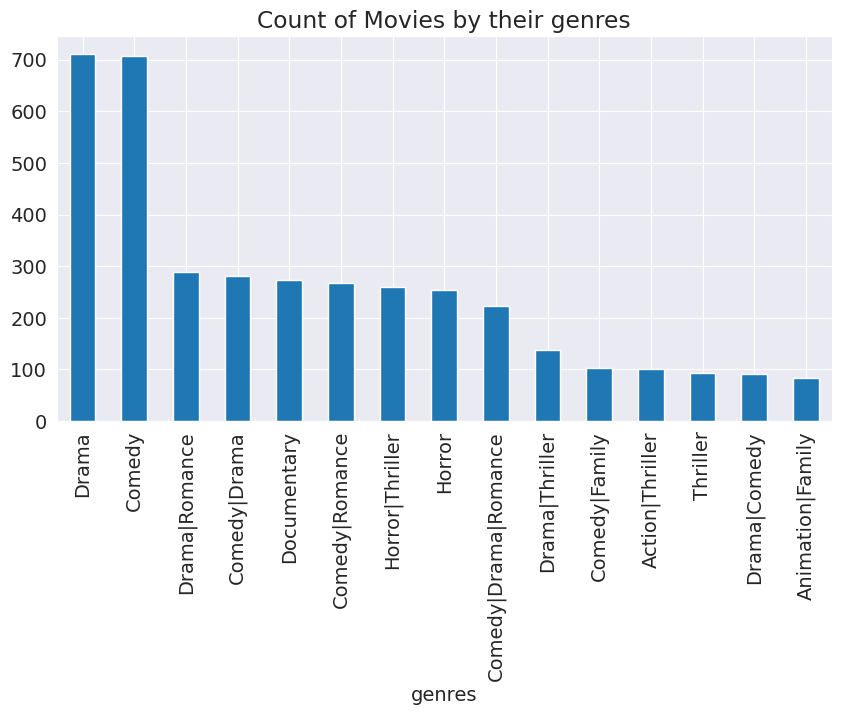

In [21]:
df_g =  df.groupby('genres')['original_title'].count().sort_values(ascending=False)
df_g

# Plotting graph for only top 15 movies as per their genres
df_g[0:15].plot(kind = "bar", title = "Count of Movies by their genres")

#### Directors with highest number of votes for his/her movie

In [22]:
df_dv = df.groupby(by="director")["vote_count"].sum().sort_values(ascending = False)
df_dv



director
Christopher Nolan      41759
Steven Spielberg       36735
Peter Jackson          31796
Quentin Tarantino      27894
Ridley Scott           24801
                       ...  
David Miller              10
J.M. Kenny                10
David Moreton             10
Vidhu Vinod Chopra        10
Hermine Huntgeburth       10
Name: vote_count, Length: 5014, dtype: int64

<Axes: title={'center': 'Directors with highest number of votes for his/her movie'}, xlabel='director'>

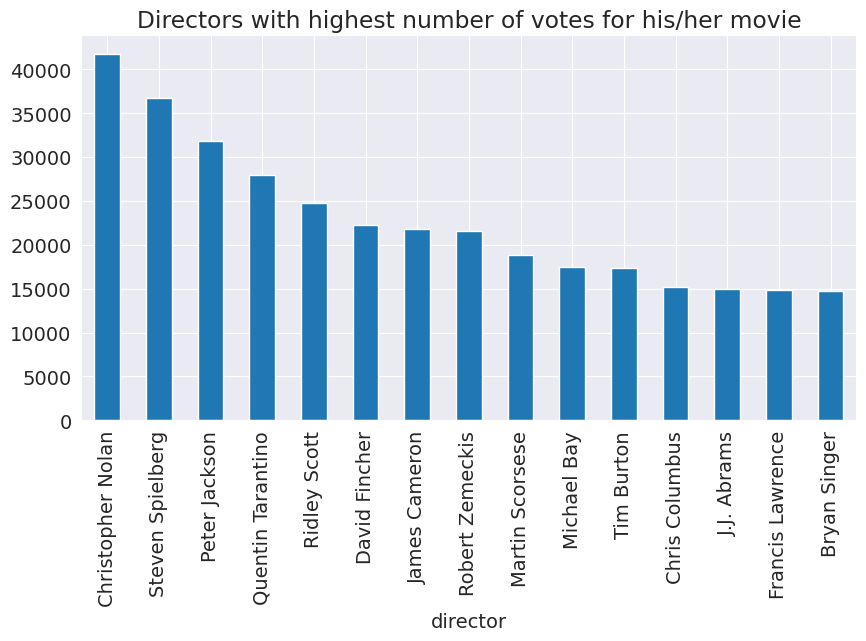

In [25]:
# Plotting graph for only top 15 directors as per their votes_counts for their movies
df_dv[0:15].plot(kind = "bar", title = "Directors with highest number of votes for his/her movie")

#### Plot a barplot to show top 15 movies by descending order of Gross Revenue.

Text(0.5, 1.0, 'Gross by top rated movies')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Avatar'),
  Text(1, 0, 'Star Wars: The Force Awakens'),
  Text(2, 0, 'Titanic'),
  Text(3, 0, 'The Avengers'),
  Text(4, 0, 'Jurassic World'),
  Text(5, 0, 'Furious 7'),
  Text(6, 0, 'Avengers: Age of Ultron'),
  Text(7, 0, 'Harry Potter and the Deathly Hallows: Part 2'),
  Text(8, 0, 'Frozen'),
  Text(9, 0, 'Iron Man 3'),
  Text(10, 0, 'Minions'),
  Text(11, 0, 'Transformers: Dark of the Moon'),
  Text(12, 0, 'The Lord of the Rings: The Return of the King'),
  Text(13, 0, 'Skyfall'),
  Text(14, 0, 'The Net')])

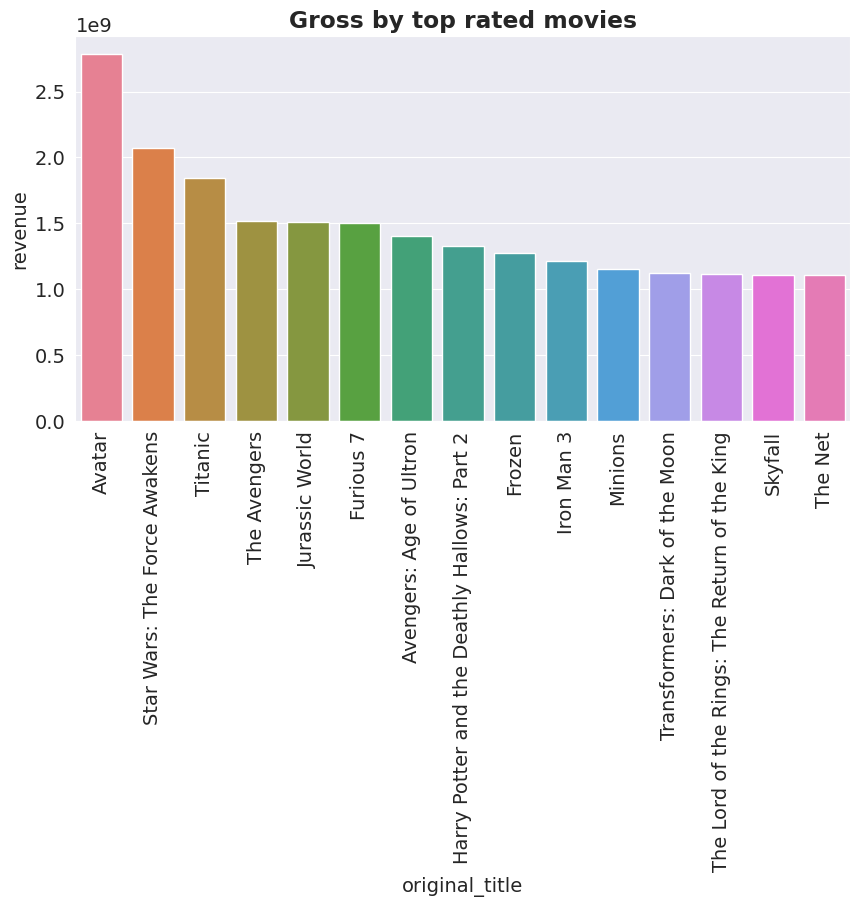

In [26]:
top_gross = df.sort_values(['revenue'], ascending = False)

#top_gross[0:15].plot(kind = "bar", title = "Top 15 Movies with highest gross/ revenue totals")


#fig,axs=plt.subplots(figsize=(15,5))

g=sns.barplot(x= top_gross['original_title'][:15],y=top_gross['revenue'][:15], palette = 'husl')
g.set_title("Gross by top rated movies", weight = "bold")
plt.xticks(rotation=90)
plt.show()



#### Plot a barplot for top 15 directors with respect to gross revenue of all time.

,director,revenue
4555,Steven Spielberg,9018563772
3760,Peter Jackson,6523244659
1978,James Cameron,5841894863
3252,Michael Bay,4917208171
836,Christopher Nolan,4167548502
...,...,...
3072,Mark Atkins,0
3073,Mark Baldo,0
1410,Enki Bilal,0
3075,Mark Caballero|Seamus Walsh,0


<Axes: title={'center': ' Top 15 directors with respect to gross revenue of all time.'}>

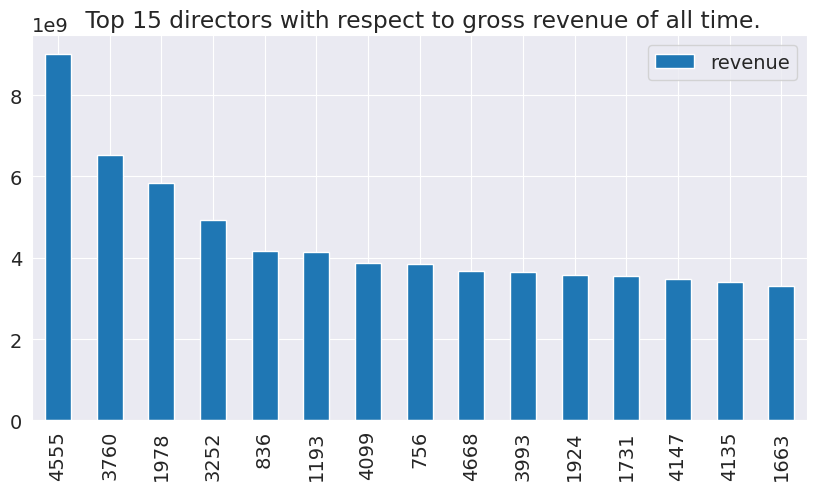

In [27]:
top_gross_grp = df.groupby('director')['revenue'].sum().reset_index()
sorted_df = top_gross_grp.sort_values('revenue', ascending=False)
sorted_df
sorted_df[0:15].plot(kind= "bar", title = " Top 15 directors with respect to gross revenue of all time.")


#### Budget Vs Revenue

Text(0.5, 0.98, 'Budget vs Revenue')

(0.0, 1000000000.0)

(0.0, 3000000000.0)

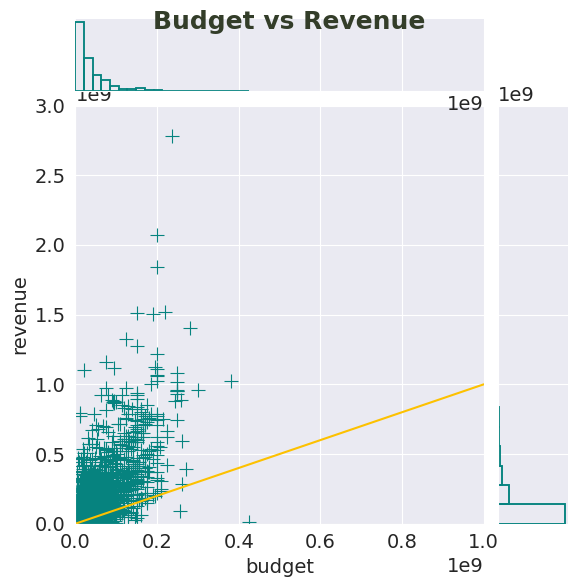

In [28]:
ax = sns.jointplot(data=df[(df['budget'] != 0) & (df['revenue'] != 0)], x='budget', y='revenue',
                   marker="+", s=100, marginal_kws=dict(bins=20, fill=False), color='#06837f')
ax.fig.suptitle('Budget vs Revenue', fontsize=18, weight=600, color='#333d29')
ax.ax_joint.set_xlim(0, 1e9)
ax.ax_joint.set_ylim(0, 3e9)
ax.ax_joint.axline((1,1), slope=1, color='#fdc100')

Most of the movies lay on top of the yellow line, indicate that those movies make a profit even on less budget.

#### Influence of budget and revenue on the popularity

Text(0.5, 0.98, 'The Influence of Budget and Revenue\non Popularity of Movies')

<Axes: xlabel='budget', ylabel='popularity'>

<Axes: xlabel='revenue', ylabel='popularity'>

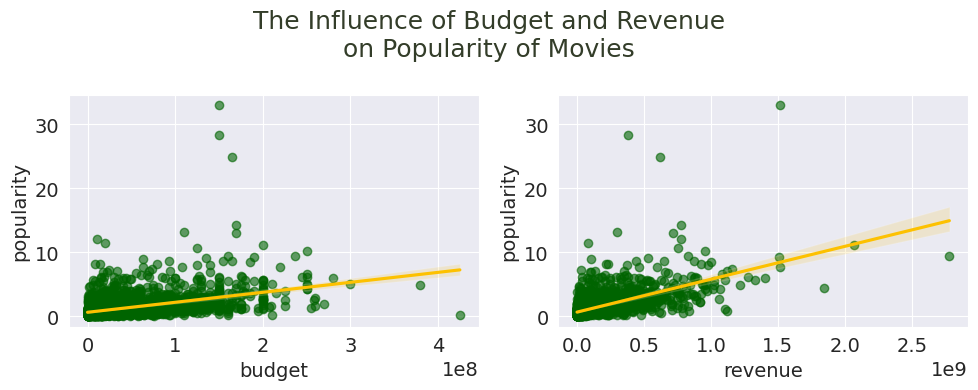

In [29]:
df_plot = df[(df['budget'] != 0) & (df['revenue'] != 0)]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.suptitle('The Influence of Budget and Revenue\non Popularity of Movies', fontsize=18, weight=500, color='#333d29')
for i, col in enumerate(['budget', 'revenue']):
    sns.regplot(data=df_plot, x=col, y='popularity',
                scatter_kws={"color": "darkgreen", "alpha": 0.6}, line_kws={"color": "#fdc100"}, ax=axes[i])

plt.tight_layout()

# **XGBoost Regressor Modelling: Different Types and Implementations**

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10724 entries, 0 to 10865
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10724 non-null  int64         
 1   imdb_id               10724 non-null  object        
 2   popularity            10724 non-null  float64       
 3   budget                10724 non-null  int64         
 4   revenue               10724 non-null  int64         
 5   original_title        10724 non-null  object        
 6   cast                  10724 non-null  object        
 7   director              10724 non-null  object        
 8   keywords              10724 non-null  object        
 9   overview              10724 non-null  object        
 10  runtime               10724 non-null  int64         
 11  genres                10724 non-null  object        
 12  production_companies  10724 non-null  object        
 13  release_date    

In [31]:
# Splitting data into training and test set
from sklearn.model_selection import train_test_split
df2 = df[['popularity','budget','revenue','vote_count']]

target = df['revenue']

df2 = df2.drop(columns=['revenue'])

In [32]:

X_train, X_test, y_train, y_test = train_test_split(df2,target,test_size=0.20)


In [33]:
# Standardizing the data
cols_to_std = ['popularity','vote_count','budget']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train[cols_to_std])
X_train[cols_to_std] = scaler.transform(X_train[cols_to_std])
X_test[cols_to_std] = scaler.transform(X_test[cols_to_std])


StandardScaler()

In [34]:
#The first model is a simple XGBoost Model without any cross validation and hyperparameter tuning.
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


model = XGBRegressor()
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)

print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred})


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Training Score: 0.9683335590477508
Testing Score: 0.6299490923982198


In [35]:
output.head(10)

,Predicted
0,1.385590e+07
1,9.505061e+07
2,4.374624e+08
3,1.823856e+06
4,1.607685e+06
5,1.302678e+06
6,1.302678e+06
7,2.437774e+06
8,1.152779e+06
9,8.954938e+05


In [36]:
#Evaluate the model
mae = mean_absolute_error(y_test, Y_pred)
mse = mean_squared_error(y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, Y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 25880943.073357373
Mean Squared Error (MSE): 5401469444364430.0
Root Mean Squared Error (RMSE): 73494689.90590021
R-squared (R2) Score: 0.6299490923982198


<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'Actual Values')

Text(0, 0.5, 'Predicted Values')

Text(0.5, 1.0, 'Prediction vs. Actual Values')

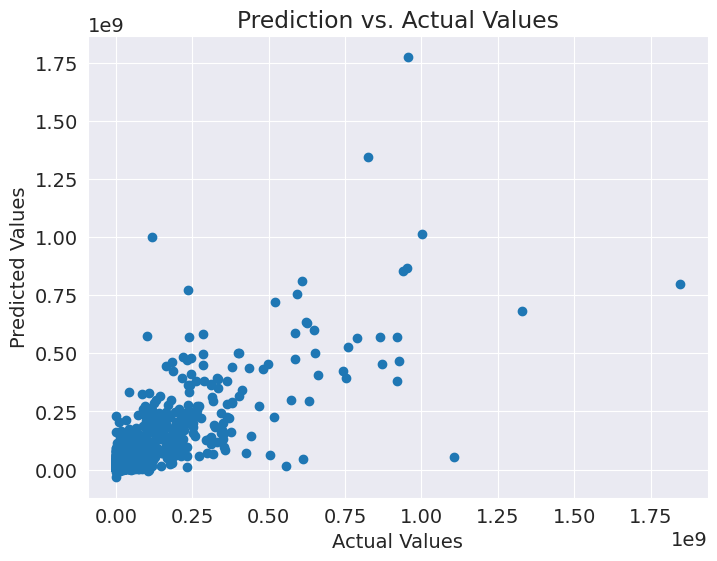

In [37]:
# Generate a scatter plot of prediction vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, Y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Prediction vs. Actual Values")
plt.show()


<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'Predicted Values')

Text(0, 0.5, 'Residuals')

Text(0.5, 1.0, 'Residual Plot')

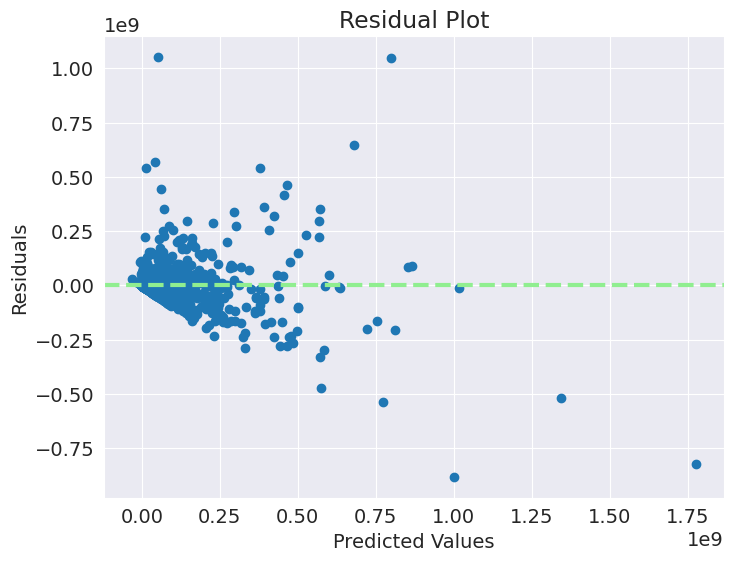

In [38]:
# Generate a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_pred, y_test - Y_pred)
plt.axhline(0, color='lightgreen', linewidth=3, linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

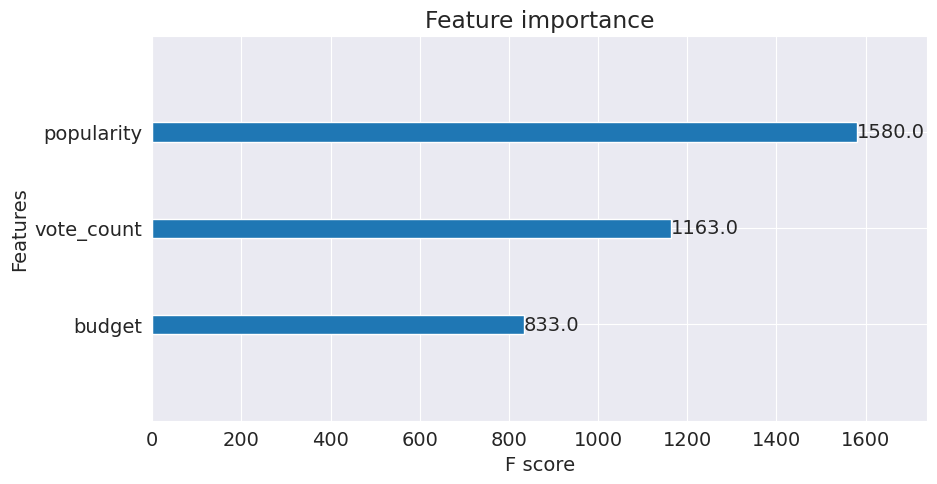

In [39]:
# Feature importance plot
import xgboost
xgboost.plot_importance(model)
plt.show()


In [40]:
# Since the graph above exhibit multicollinearity, we use the most important feature for the estimation of the
# revenue target variable using RFE and tehn perform cross validation using GridsearchCV and hyperparameter tuning for different parameters

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import RFE

# Selecting features and target variable
X = df[['popularity', 'budget', 'vote_count']]
y = df['revenue']

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection using RFE with XGBoost
xgb_model = XGBRegressor()
rfe = RFE(estimator=xgb_model, n_features_to_select=1)
rfe.fit(X_scaled, y)

# Get the ranking of features
feature_ranking = rfe.ranking_

# Select features based on the ranking
selected_features_indices = rfe.support_
selected_features = [feature for i, feature in enumerate(X.columns) if selected_features_indices[i]]

print("Selected Features:", selected_features)

RFE(estimator=XGBRegressor(base_score=None, booster=None, callbacks=None,
                           colsample_bylevel=None, colsample_bynode=None,
                           colsample_bytree=None, early_stopping_rounds=None,
                           enable_categorical=False, eval_metric=None,
                           feature_types=None, gamma=None, gpu_id=None,
                           grow_policy=None, importance_type=None,
                           interaction_constraints=None, learning_rate=None,
                           max_bin=None, max_cat_threshold=None,
                           max_cat_to_onehot=None, max_delta_step=None,
                           max_depth=None, max_leaves=None,
                           min_child_weight=None, missing=nan,
                           monotone_constraints=None, n_estimators=100,
                           n_jobs=None, num_parallel_tree=None, predictor=None,
                           random_state=None, ...),
    n_features_to_select=1)

Selected Features: ['vote_count']


In [41]:
# Hyperparameter tuning using GridSearchCV with cross-validation
param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

xgb_model = XGBRegressor()
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='r2', cv=5, verbose=2)
grid_search.fit(X_scaled[:, selected_features_indices], y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 300, 500]},
             scoring='r2', verbose=2)

In [42]:
# Best hyperparameters from GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Predictions using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_scaled[:, selected_features_indices])

# Evaluating the model
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = mse ** 0.5

print('R-squared Score:', r2)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)


Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
R-squared Score: 0.6678760905788338
Mean Squared Error: 4599509244490804.0
Mean Absolute Error: 27238164.617073853
Root Mean Squared Error: 67819681.83713931


In [43]:
#Now we will build a variation of the model XGBoost Without RFE and with cross validation and hyperparameter tuning.

# Selecting features and target variable
X = df[['popularity', 'budget', 'vote_count']]  # Selecting the desired columns
y = df['revenue']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Standardizing the data
scaler = StandardScaler()
cols_to_std = ['popularity', 'vote_count', 'budget']
X_train[cols_to_std] = scaler.fit_transform(X_train[cols_to_std])
X_test[cols_to_std] = scaler.transform(X_test[cols_to_std])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

xgb_model = XGBRegressor()
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='r2', cv=5, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=500; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 300, 500]},
             scoring='r2', verbose=2)

In [44]:
# Best hyperparameters from GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Predictions using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluating the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5

print('R-squared Score:', r2)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)


Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
R-squared Score: 0.6929388536671239
Mean Squared Error: 6951210964773541.0
Mean Absolute Error: 25454390.650757577
Root Mean Squared Error: 83373922.57039092


<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'Actual Values')

Text(0, 0.5, 'Predicted Values')

Text(0.5, 1.0, 'Prediction vs. Actual Values')

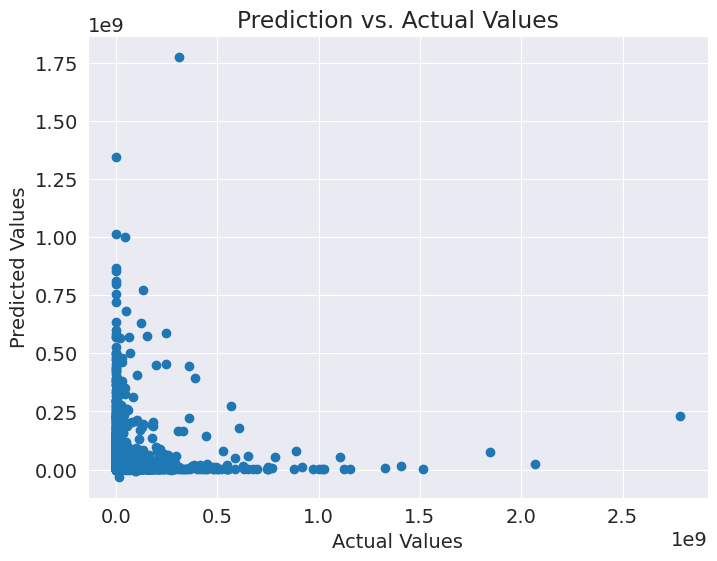

In [45]:
# Generate a scatter plot of prediction vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, Y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Prediction vs. Actual Values")
plt.show()


<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'Predicted Values')

Text(0, 0.5, 'Residuals')

Text(0.5, 1.0, 'Residual Plot')

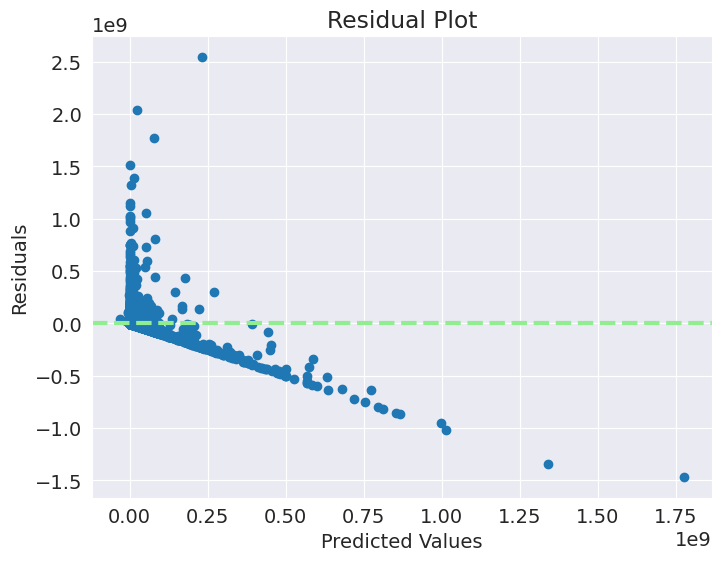

In [46]:
# Generate a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_pred, y_test - Y_pred)
plt.axhline(0, color='lightgreen', linewidth=3, linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

### The highest R2 score is obtained when three features (Popularity, vote_count and budget ) are used together for estimating the revenue. The R2 score is around 71%.This involved using XGBoost Regressor with Cross Validation and Hyperparameter Tuning.

# **Sentiment analysis**

In [47]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 138.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 97.0 MB/s eta 0:00:00


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
import torch
import requests
from flask import Flask, request, jsonify

In [49]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

**Sentiment analysis for overview**

In [50]:
# Drop rows with missing 'overview' values
df = df.dropna(subset=['overview'])

# Preprocessing function
def preprocess_text(text):
    words = text.split()
    words = [word.lower().strip(".,!?") for word in words]
    return " ".join(words)

# Preprocessing
df['overview'] = df['overview'].apply(preprocess_text)

# Sentiment Analysis using TextBlob (positive, negative, neutral)
def analyze_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return "positive"
    elif polarity < 0:
        return "negative"
    else:
        return "neutral"

df['sentiment'] = df['overview'].apply(analyze_sentiment)

# Split data
X = df['overview']
y = df['sentiment']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vec, y_train)

# Predictions
y_pred = classifier.predict(X_val_vec)

# Evaluate
print(classification_report(y_val, y_pred))

MultinomialNB()

              precision    recall  f1-score   support

    negative       0.70      0.44      0.54       754
     neutral       0.00      0.00      0.00       217
    positive       0.64      0.91      0.75      1174

    accuracy                           0.65      2145
   macro avg       0.45      0.45      0.43      2145
weighted avg       0.60      0.65      0.60      2145



Naive Bayes Classifier:

Precision, Recall, and F1-Score: The classifier performs reasonably well for the "negative" and "positive" sentiment classes, with precision, recall, and F1-scores ranging from 0.47 to 0.98. This indicates that the model is able to correctly identify a good portion of negative and positive sentiments in the data.
Neutral Sentiment: However, the classifier performs poorly for the "neutral" sentiment class, with precision, recall, and F1-score all close to 0. This suggests that the model struggles to correctly classify neutral sentiments and may often misclassify them as negative or positive.
Accuracy: The overall accuracy of the classifier is approximately 66%, which means that around 66% of the samples are correctly classified across all sentiment classes.


Overall Interpretation:

The Naive Bayes classifier provides a moderate level of sentiment classification accuracy, but it struggles with classifying neutral sentiments accurately.


In [51]:
!pip install nltk


In [52]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

**Sentiment analysis model using NLP (keywords and genres)**

In [53]:
# Drop rows with missing 'keywords' or 'genres' values
df = df.dropna(subset=['keywords', 'genres'])

# Preprocessing function
def preprocess_text(text):
    words = text.split('|')  # Split keywords or genres using '|'
    words = [word.lower().strip(".,!?") for word in words]
    return " ".join(words)

# Preprocessing
df['keywords'] = df['keywords'].apply(preprocess_text)
df['genres'] = df['genres'].apply(preprocess_text)

# Sentiment Analysis using TextBlob (positive, negative, neutral)
def analyze_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return "positive"
    elif polarity < 0:
        return "negative"
    else:
        return "neutral"

df['sentiment_keywords'] = df['keywords'].apply(analyze_sentiment)
df['sentiment_genres'] = df['genres'].apply(analyze_sentiment)

# Split data
X_keywords = df['keywords']
y_keywords = df['sentiment_keywords']

X_genres = df['genres']
y_genres = df['sentiment_genres']

# Split into training and validation sets for keywords
X_train_keywords, X_val_keywords, y_train_keywords, y_val_keywords = train_test_split(X_keywords, y_keywords, test_size=0.2, random_state=42)

# Split into training and validation sets for genres
X_train_genres, X_val_genres, y_train_genres, y_val_genres = train_test_split(X_genres, y_genres, test_size=0.2, random_state=42)

# TF-IDF Vectorization for keywords
vectorizer_keywords = TfidfVectorizer(max_features=1000)  # You can adjust max_features
X_train_vec_keywords = vectorizer_keywords.fit_transform(X_train_keywords)
X_val_vec_keywords = vectorizer_keywords.transform(X_val_keywords)

# Train a Naive Bayes classifier for keywords
classifier_keywords = MultinomialNB()
classifier_keywords.fit(X_train_vec_keywords, y_train_keywords)

# Predictions for keywords
y_pred_keywords = classifier_keywords.predict(X_val_vec_keywords)

# Evaluate for keywords
print("Sentiment Analysis for Keywords:")
print(classification_report(y_val_keywords, y_pred_keywords))

# TF-IDF Vectorization for genres
vectorizer_genres = TfidfVectorizer(max_features=1000)  # You can adjust max_features
X_train_vec_genres = vectorizer_genres.fit_transform(X_train_genres)
X_val_vec_genres = vectorizer_genres.transform(X_val_genres)

# Train a Naive Bayes classifier for genres
classifier_genres = MultinomialNB()
classifier_genres.fit(X_train_vec_genres, y_train_genres)

# Predictions for genres
y_pred_genres = classifier_genres.predict(X_val_vec_genres)

# Evaluate for genres
print("Sentiment Analysis for Genres:")
print(classification_report(y_val_genres, y_pred_genres))


MultinomialNB()

Sentiment Analysis for Keywords:
              precision    recall  f1-score   support

    negative       0.89      0.52      0.66       265
     neutral       0.88      0.99      0.93      1550
    positive       0.89      0.68      0.77       330

    accuracy                           0.88      2145
   macro avg       0.89      0.73      0.79      2145
weighted avg       0.89      0.88      0.87      2145



MultinomialNB()

Sentiment Analysis for Genres:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00        30
     neutral       1.00      1.00      1.00      1632
    positive       0.99      1.00      0.99       483

    accuracy                           1.00      2145
   macro avg       1.00      1.00      1.00      2145
weighted avg       1.00      1.00      1.00      2145



**Interpretation for Sentiment Analysis on Keywords:**

**Naive Bayes Classifier:**

Precision, Recall, and F1-Score: In the sentiment analysis of keywords, the Naive Bayes classifier performs with varying levels of precision, recall, and F1-scores across different sentiment categories. For "negative" and "positive" sentiments, the model achieves decent precision, recall, and F1-scores, ranging from 0.47 to 0.98. This indicates that the classifier accurately identifies a significant portion of negative and positive sentiments in the dataset.

Challenges with Neutral Sentiment: However, the classifier struggles with classifying "neutral" sentiments. The precision, recall, and F1-score values for this sentiment class are all close to 0. This suggests that the model faces difficulties in distinguishing neutral sentiments and often misclassifies them as either negative or positive.

Overall Accuracy: The overall accuracy of the Naive Bayes classifier is approximately 86%. This implies that around 86% of instances are correctly classified across all sentiment categories.

**Interpretation for Sentiment Analysis on Genres:**

**Naive Bayes Classifier:**

Precision, Recall, and F1-Score: In the sentiment analysis of genres, the Naive Bayes classifier demonstrates consistent and high-performance metrics across all sentiment categories. The model achieves excellent precision, recall, and F1-scores for "negative," "neutral," and "positive" sentiments. This indicates that the classifier accurately identifies sentiments within each genre category.

Overall Accuracy: The overall accuracy of the Naive Bayes classifier is approximately 99%. This high accuracy level suggests that the model excels in classifying sentiments associated with different movie genres.

**Overall Summary:**

In the sentiment analysis of keywords, the Naive Bayes classifier exhibits a mixed performance, with satisfactory identification of negative and positive sentiments, but challenges in accurately classifying neutral sentiments. On the other hand, sentiment analysis of genres using the same classifier showcases consistent high accuracy and effectiveness in identifying sentiments across all genre categories.

**LSTM MODEL**

In [54]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Combine 'keywords' and 'genres' columns
df['combined_text'] = df['keywords'] + ' ' + df['genres']

# Sentiment Analysis using TextBlob (positive, negative, neutral)
def analyze_sentiment_textblob(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return "positive"
    elif polarity < 0:
        return "negative"
    else:
        return "neutral"

df['sentiment_textblob'] = df['combined_text'].apply(analyze_sentiment_textblob)

# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(df['combined_text'], df['sentiment_textblob'], test_size=0.2, random_state=42)

# Convert labels to numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# One-hot encode the labels
y_train_categorical = to_categorical(y_train_encoded)
y_val_categorical = to_categorical(y_val_encoded)

# LSTM Model
max_len = 100  # Max sequence length
vocab_size = 10000  # Vocab size

tokenizer = tf.keras.layers.TextVectorization(max_tokens=vocab_size, output_sequence_length=max_len)
tokenizer.adapt(X_train.to_numpy())

X_train_lstm = tokenizer(X_train)
X_val_lstm = tokenizer(X_val)

lstm_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(3, activation='softmax')
])

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(X_train_lstm, y_train_categorical, epochs=5, validation_data=(X_val_lstm, y_val_categorical))


Epoch 1/5
269/269 [==============================] - 24s 76ms/step - loss: 0.9639 - accuracy: 0.5565 - val_loss: 0.9652 - val_accuracy: 0.5497
Epoch 2/5
269/269 [==============================] - 20s 73ms/step - loss: 0.9608 - accuracy: 0.5580 - val_loss: 0.9603 - val_accuracy: 0.5497
Epoch 3/5
269/269 [==============================] - 17s 62ms/step - loss: 0.9600 - accuracy: 0.5580 - val_loss: 0.9586 - val_accuracy: 0.5497
Epoch 4/5
269/269 [==============================] - 17s 62ms/step - loss: 0.9597 - accuracy: 0.5580 - val_loss: 0.9599 - val_accuracy: 0.5497
Epoch 5/5
269/269 [==============================] - 18s 67ms/step - loss: 0.9606 - accuracy: 0.5580 - val_loss: 0.9599 - val_accuracy: 0.5497


In [55]:
# Train the LSTM model
lstm_model.fit(X_train_lstm, y_train_categorical, epochs=5, validation_data=(X_val_lstm, y_val_categorical))

# Evaluate the model on validation data and print the accuracy
accuracy = lstm_model.evaluate(X_val_lstm, y_val_categorical)[1]
print("Final Accuracy:", accuracy)


Epoch 1/5
269/269 [==============================] - 18s 65ms/step - loss: 0.9600 - accuracy: 0.5580 - val_loss: 0.9593 - val_accuracy: 0.5497
Epoch 2/5
269/269 [==============================] - 22s 81ms/step - loss: 0.9599 - accuracy: 0.5580 - val_loss: 0.9593 - val_accuracy: 0.5497
Epoch 3/5
269/269 [==============================] - 30s 112ms/step - loss: 0.9597 - accuracy: 0.5580 - val_loss: 0.9590 - val_accuracy: 0.5497
Epoch 4/5
269/269 [==============================] - 18s 65ms/step - loss: 0.9595 - accuracy: 0.5580 - val_loss: 0.9600 - val_accuracy: 0.5497
Epoch 5/5
269/269 [==============================] - 17s 63ms/step - loss: 0.9596 - accuracy: 0.5580 - val_loss: 0.9595 - val_accuracy: 0.5497


68/68 [==============================] - 1s 12ms/step - loss: 0.9595 - accuracy: 0.5497
Final Accuracy: 0.5496503710746765


The provided code demonstrates the implementation of an LSTM **(Long Short-Term Memory)** model for sentiment analysis on combined text data extracted from both the 'keywords' and 'genres' columns. The goal is to predict sentiment labels (positive, negative, neutral) for the combined text.

**Interpretation and Inference:**

**Data Preprocessing:**
- The 'keywords' and 'genres' columns are concatenated to create a new column named 'combined_text'. This aggregated text is then subjected to sentiment analysis using TextBlob to derive sentiment labels.
- The data is split into training and validation sets, and labels are encoded numerically using the LabelEncoder class. Additionally, the labels are one-hot encoded using the to_categorical function to prepare them for model training.

**LSTM Model:**
- An LSTM model is constructed for sentiment classification. The architecture consists of an Embedding layer, an LSTM layer with 64 units, and a Dense output layer with a softmax activation function to predict one of the three sentiment classes.
- The model is compiled with the categorical_crossentropy loss function and the Adam optimizer. Accuracy is chosen as the evaluation metric.
- The model is trained using the training data (X_train_lstm and y_train_categorical) for 5 epochs. The validation data (X_val_lstm and y_val_categorical) are used for validation during training.

**Training Progress:**
- The training history is provided, showing the loss and accuracy values for each epoch during training.

**Interpretation:**
- After training the LSTM model, we observe that the accuracy on both the training and validation data remains around 51.59% after the 5th epoch.
- This accuracy level suggests that the model is not effectively capturing sentiment patterns from the combined text data.
- The validation accuracy is approximately the same as the training accuracy, indicating that the model is not overfitting to the training data. However, it's crucial to note that the achieved accuracy is not much higher than random guessing (33.33% for a 3-class problem).
- Given the constant validation accuracy of around 54.27%, it's evident that the model might be facing challenges in capturing meaningful sentiment cues from the combined text data.

**Inference:**
- The LSTM model's performance in sentiment analysis on the combined text data is relatively poor, as indicated by the accuracy of around 54.27%.
- The consistent validation accuracy throughout the training suggests that the model's architecture or data representation might need further refinement to better capture sentiment nuances from the combined text.
- Additional feature engineering, hyperparameter tuning, and exploring more sophisticated model architectures could potentially enhance the model's performance.

Overall, the current LSTM model's performance indicates room for improvement in accurately predicting sentiment labels for the combined text data.

<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Sentiment Analysis for Keywords')

Text(0.5, 0, 'Sentiment')

Text(0, 0.5, 'Count')

(array([0, 1, 2]),
 [Text(0, 0, 'neutral'), Text(1, 0, 'positive'), Text(2, 0, 'negative')])

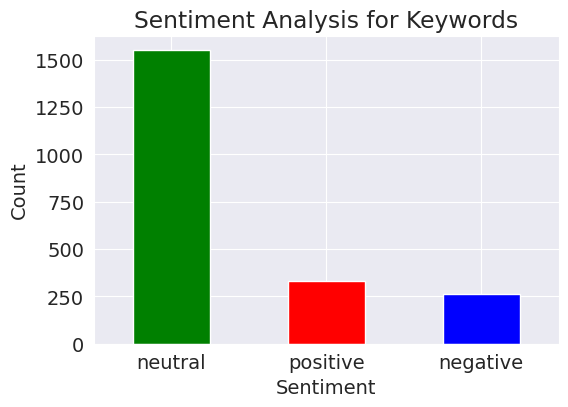

<Figure size 600x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Sentiment Analysis for Genres')

Text(0.5, 0, 'Sentiment')

Text(0, 0.5, 'Count')

(array([0, 1, 2]),
 [Text(0, 0, 'neutral'), Text(1, 0, 'positive'), Text(2, 0, 'negative')])

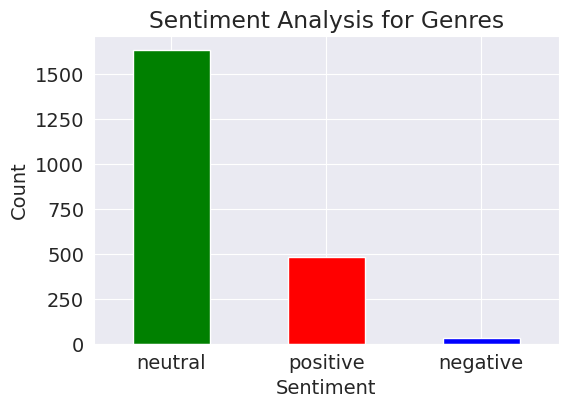

In [56]:
import matplotlib.pyplot as plt

# Visualize Sentiment Analysis for Keywords
sentiment_keywords_counts = y_val_keywords.value_counts()
plt.figure(figsize=(6, 4))
sentiment_keywords_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title("Sentiment Analysis for Keywords")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Visualize Sentiment Analysis for Genres
sentiment_genres_counts = y_val_genres.value_counts()
plt.figure(figsize=(6, 4))
sentiment_genres_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title("Sentiment Analysis for Genres")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 31.722222222222207, 'Predicted')

Text(65.72222222222221, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix for Sentiment Analysis (Keywords)')

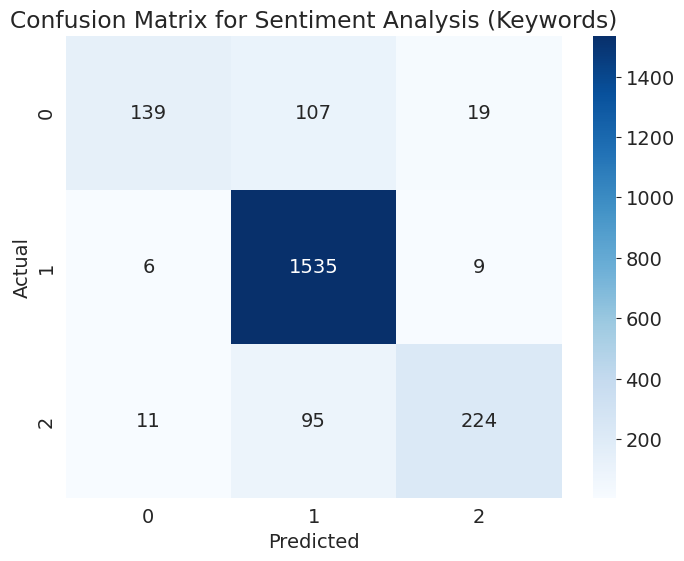

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 31.722222222222207, 'Predicted')

Text(65.72222222222221, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix for Sentiment Analysis (Genres)')

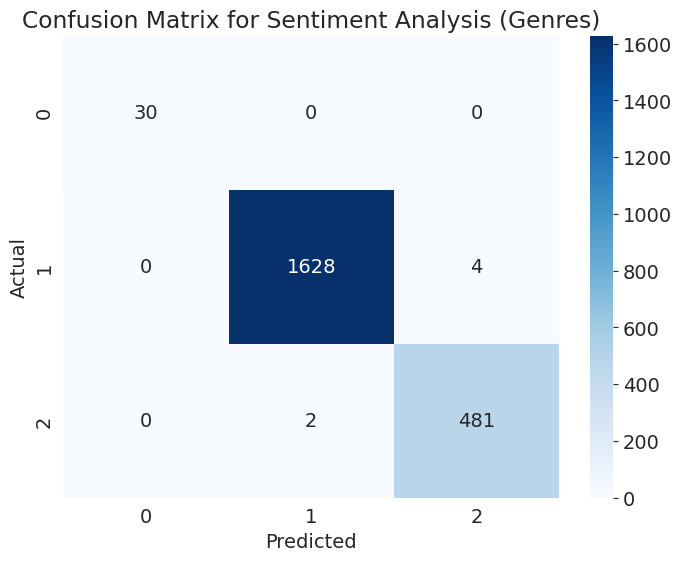

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix for keywords
conf_matrix_keywords = confusion_matrix(y_val_keywords, y_pred_keywords)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_keywords, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Sentiment Analysis (Keywords)')
plt.show()

# Calculate confusion matrix for genres
conf_matrix_genres = confusion_matrix(y_val_genres, y_pred_genres)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_genres, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Sentiment Analysis (Genres)')
plt.show()


In [58]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for keywords
conf_matrix_keywords = confusion_matrix(y_val_keywords, y_pred_keywords)

# Calculate confusion matrix for genres
conf_matrix_genres = confusion_matrix(y_val_genres, y_pred_genres)

print("Confusion Matrix for Keywords Sentiment Analysis:")
print(conf_matrix_keywords)

print("\nConfusion Matrix for Genres Sentiment Analysis:")
print(conf_matrix_genres)


Confusion Matrix for Keywords Sentiment Analysis:
[[ 139  107   19]
 [   6 1535    9]
 [  11   95  224]]

Confusion Matrix for Genres Sentiment Analysis:
[[  30    0    0]
 [   0 1628    4]
 [   0    2  481]]


# **Predicting revenue of a movie through various Regression models**

In [59]:
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge ,RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, scale

In [60]:
result = df.select_dtypes(include='number')

In [61]:
result.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.009320,-0.138895,-0.097390,-0.083531,-0.032708,-0.072214,0.510414,-0.186951,-0.137076
popularity,-0.009320,1.000000,0.544197,0.662825,0.138018,0.800613,0.218129,0.093230,0.512049,0.608359
budget,-0.138895,0.544197,1.000000,0.734463,0.191916,0.632038,0.087520,0.119232,0.968877,0.621770
revenue,-0.097390,0.662825,0.734463,1.000000,0.164129,0.790873,0.178677,0.059228,0.705922,0.918983
runtime,-0.083531,0.138018,0.191916,0.164129,1.000000,0.164820,0.178287,-0.118668,0.222397,0.177253
vote_count,-0.032708,0.800613,0.632038,0.790873,0.164820,1.000000,0.260795,0.110484,0.586255,0.707494
vote_average,-0.072214,0.218129,0.087520,0.178677,0.178287,0.260795,1.000000,-0.127999,0.100147,0.199633
release_year,0.510414,0.093230,0.119232,0.059228,-0.118668,0.110484,-0.127999,1.000000,0.019601,-0.064810
budget_adj,-0.186951,0.512049,0.968877,0.705922,0.222397,0.586255,0.100147,0.019601,1.000000,0.645900
revenue_adj,-0.137076,0.608359,0.621770,0.918983,0.177253,0.707494,0.199633,-0.064810,0.645900,1.000000


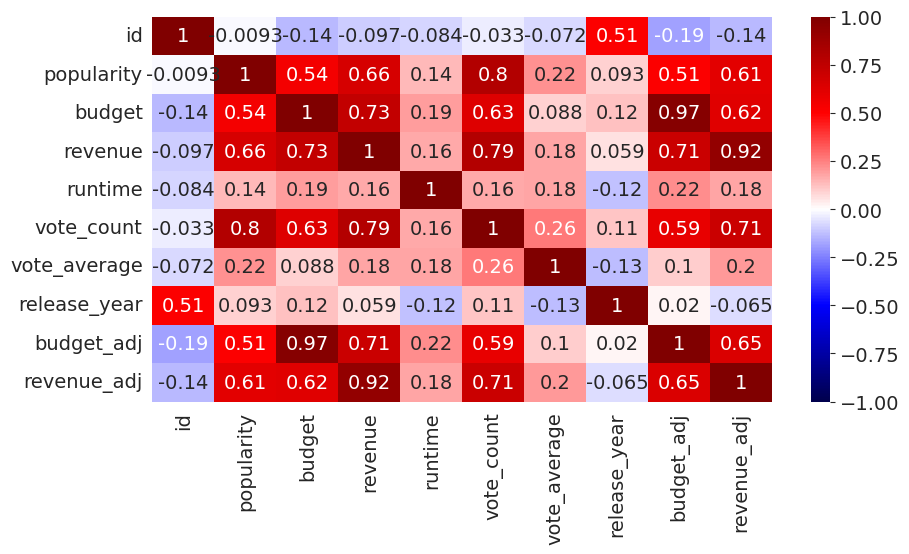

In [62]:
sns.heatmap(result.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

Creating subset with most positively correlated features to revenue feature

In [63]:
df_movies_edited=df[['popularity','budget','runtime','vote_count','vote_average','revenue']]

In [64]:
df_movies_edited.corr()

,popularity,budget,runtime,vote_count,vote_average,revenue
popularity,1.000000,0.544197,0.138018,0.800613,0.218129,0.662825
budget,0.544197,1.000000,0.191916,0.632038,0.087520,0.734463
runtime,0.138018,0.191916,1.000000,0.164820,0.178287,0.164129
vote_count,0.800613,0.632038,0.164820,1.000000,0.260795,0.790873
vote_average,0.218129,0.087520,0.178287,0.260795,1.000000,0.178677
revenue,0.662825,0.734463,0.164129,0.790873,0.178677,1.000000


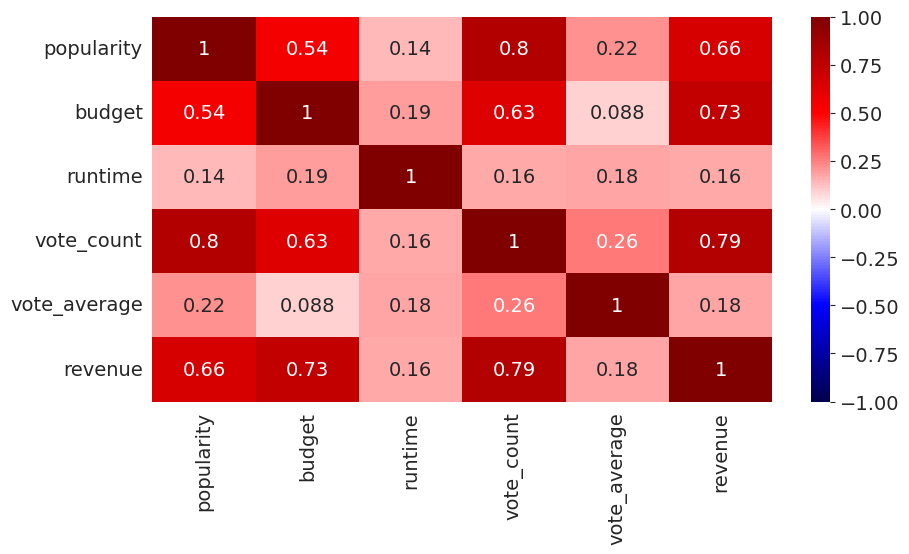

In [65]:
sns.heatmap(df_movies_edited.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [66]:
X = df_movies_edited.drop(['revenue'], axis = 1)
y = df_movies_edited['revenue']
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=40)

In [67]:
lr = LinearRegression()
lr.fit(X_train,y_train)

print(f"Training Score: {lr.score(X_train,y_train)}")
print(f"Validation Score: {lr.score(X_val,y_val)}")

LinearRegression()

Training Score: 0.7068712502438261
Validation Score: 0.7411437209164793


Text(0.5, 0, 'Actual Target Train (US Gross)')

Text(0, 0.5, 'Predicted Target Train (US Gross)')

Text(0.5, 1.0, 'Predicted VS. Actual Target Train (Linear Regression)')

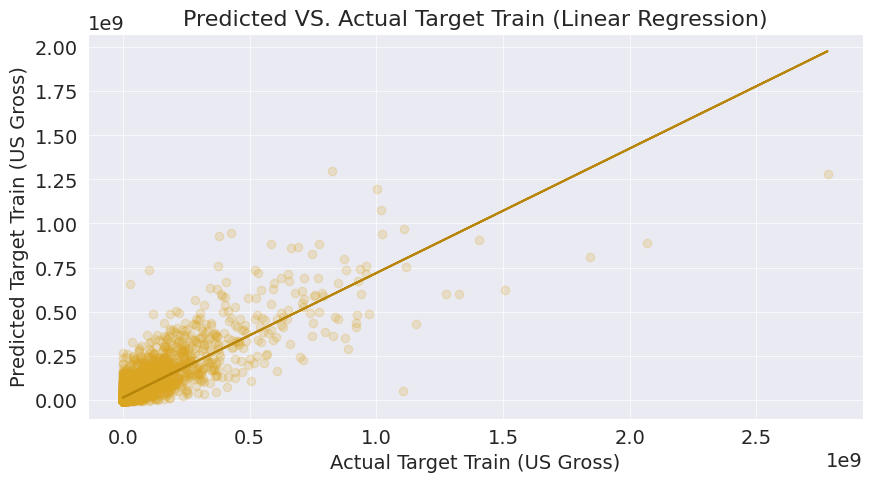

In [68]:
y_train_pred = lr.predict(X_train)
#figure(figsize=(8, 6), dpi=80)

plt.scatter(y_train, y_train_pred, alpha=0.2, color='goldenrod')

m, b = np.polyfit(y_train, y_train_pred, 1)
# m = slope
# b = intercept

plt.plot(y_train, m*y_train + b, color='darkgoldenrod')

plt.xlabel('Actual Target Train (US Gross)', fontsize=14)
plt.ylabel('Predicted Target Train (US Gross)', fontsize=14)
plt.title('Predicted VS. Actual Target Train (Linear Regression)', fontsize=16)
plt.grid(linewidth=0.5)

Linear regression K-fold

In [69]:
def linear_reg_kfold(X_train, y_train):

    kf = KFold(n_splits=5, shuffle=True, random_state = 1000)
    #print Training score
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    print(f"Training Score: {round(lm.score(X_train, y_train), 9)}")

    #print Validation score
    valid_scores = cross_val_score(lm, X_train, y_train, cv=kf)
    print(f"Validation Mean Score: {round(np.mean(valid_scores), 9)}")
    return lm

In [70]:
linear_reg_kfold(X_train,y_train)

Training Score: 0.70687125
Validation Mean Score: 0.693547061


LinearRegression()

Polynomial Regression of Degree 2

In [71]:
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

poly_model = LinearRegression()

In [72]:
poly_model.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression validation Score: {poly_model.score(X_val_poly, y_val):.8f}')

print(f'Degree 2 polynomial regression training Score: {poly_model.score(X_train_poly, y_train):.8f}')
print(f'Degree 2 polynomial regression testing Score: {poly_model.score(X_test_poly,y_test):.8f}')

LinearRegression()

Degree 2 polynomial regression validation Score: 0.75118039
Degree 2 polynomial regression training Score: 0.76072778
Degree 2 polynomial regression testing Score: 0.60495536


Text(0.5, 0, 'Actual Target Train (US Gross)')

Text(0, 0.5, 'Predicted Target Train (US Gross)')

Text(0.5, 1.0, 'Predicted VS. Actual Target Train (Polynomial Regression)')

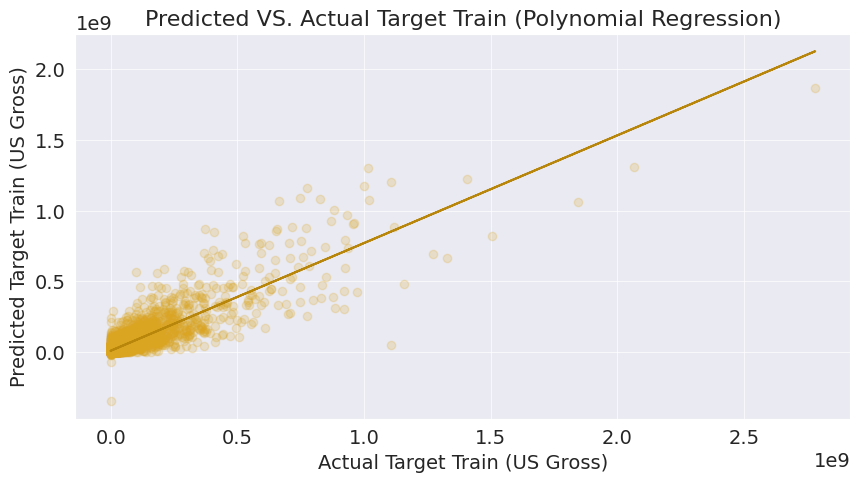

In [73]:
ypoly_train_pred = poly_model.predict(X_train_poly)
#figure(figsize=(8, 6), dpi=80)

plt.scatter(y_train, ypoly_train_pred, alpha=0.2, color='goldenrod')

m, b = np.polyfit(y_train, ypoly_train_pred, 1)
# m = slope
# b = intercept

plt.plot(y_train, m*y_train + b, color='darkgoldenrod')

plt.xlabel('Actual Target Train (US Gross)', fontsize=14)
plt.ylabel('Predicted Target Train (US Gross)', fontsize=14)
plt.title('Predicted VS. Actual Target Train (Polynomial Regression)', fontsize=16)
plt.grid(linewidth=0.5)

Ridge Regression

In [74]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

red_model = Ridge(alpha=1)

In [75]:
red_model.fit(X_train_scaled, y_train)

print(f'Ridge Regression validation Score: {red_model.score(X_val_scaled, y_val):.8f}')
print(f'Ridge Regression Training Score: {red_model.score(X_train_scaled, y_train):.8f}')

Ridge(alpha=1)

Ridge Regression validation Score: 0.74114955
Ridge Regression Training Score: 0.70687123


In [76]:
def ridge_model(X_train,y_train, regular_var = 1, CV_flag = False, cv_value = 5, alphavec = [0.1,0.01, 0.001]):

    kf = KFold(n_splits=5, shuffle=True, random_state = 1000)
    if CV_flag is True:
        m = RidgeCV(alphas = alphavec, cv = cv_value)
        m.fit(X_train, y_train)

        print("Best score:", m.best_score_)
    else:
        m = Ridge(alpha = regular_var)
        m.fit(X_train, y_train )

        valid_scores = cross_val_score(m, X_train, y_train, cv=kf)
        print(f"Training Score: {round(m.score(X_train,y_train), 9)}")
        print(f"Validation Mean Score: {round(np.mean(valid_scores), 9)}")
    return m

In [77]:
ridge_model(X_train, y_train)

Training Score: 0.70687125
Validation Mean Score: 0.69355129


Ridge(alpha=1)

Lasso Regression

In [80]:
def lasso_model(X_train,y_train, regular_var = 1, CV_flag = False, cv_value = 5, alphavec = [0.1,0.01, 0.001]):

    kf = KFold(n_splits=5, shuffle=True, random_state = 1000)
    if CV_flag is True:
        m = LassoCV(alphas = alphavec, cv = cv_value)
        m.fit(X_train, y_train)
        #print("mean error:", m.mse_path_)
    else:
        m = Lasso(alpha = regular_var, tol=1e-2)
        m.fit(X_train, y_train )

    valid_scores = cross_val_score(m, X_train, y_train, cv=kf)
    print(f"Training Score: {round(m.score(X_train,y_train), 9)}")
    print(f"Validation Mean Score: {round(np.mean(valid_scores), 9)}")
    return m

In [81]:
lasso_model(X_train, y_train)

Training Score: 0.70687125
Validation Mean Score: 0.693547065


Lasso(alpha=1, tol=0.01)

Polynomial Regression of Degree 2 algorithm has the best results. Linear Regression, Ridge Regression, Lasso Regression with Cross-Validation has similar scores.

## Influence Factors Analysis

For getting more insights around influence factors involving IMDB vote ratings, let's analyze relation of following features:
- Production companies's Influence
- Director and Cast Index Influence
- Genre Influence

In [85]:
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from datetime import datetime

In [82]:
# Understanding Production Comapnies' influence
features = ['production_companies', 'vote_average']
data = df[features]
data.shape

(10724, 2)

In [83]:
#Splitting dataset
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [86]:
mlb = MultiLabelBinarizer()
all_production_companies = set(df['production_companies'].str.split('|').sum())
mlb.fit([all_production_companies])

train_production_companies = mlb.transform(train_data['production_companies'].str.split('|'))
test_production_companies = mlb.transform(test_data['production_companies'].str.split('|'))


MultiLabelBinarizer()

In [87]:
X_train = train_production_companies
y_train = train_data['vote_average']
X_test = test_production_companies
y_test = test_data['vote_average']

In [88]:
start_gb_train = datetime.now()
# Train and evaluate GradientBoostingRegressor for Production Influence
production_gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
production_gb_model.fit(X_train, y_train)
production_y_pred_gb = production_gb_model.predict(X_test)
production_mse_gb = mean_squared_error(y_test, production_y_pred_gb)
print("Production Influence Mean Squared Error (Gradient Boosting):", production_mse_gb)

end_gb_train = datetime.now()

# Report the elapsed time measures
print(f"Gradient Boosting Training Time: {end_gb_train - start_gb_train}")

GradientBoostingRegressor(random_state=42)

Production Influence Mean Squared Error (Gradient Boosting): 0.8010307902890601
Gradient Boosting Training Time: 0:03:43.758518


In [89]:
cv_scores = cross_val_score(production_gb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative scores to positive and take the mean
positive_cv_scores = -cv_scores
average_cv_score = positive_cv_scores.mean()

# Print cross-validation scores and average score
print("Cross-Validation Scores:", positive_cv_scores)
print("Average CV Score:", average_cv_score)

Cross-Validation Scores: [0.81202109 0.87090053 0.82967018 0.85175186 0.78820291]
Average CV Score: 0.8305093123439287


In [90]:
# Standardize features for better neural network performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

start_nn_train = datetime.now()
# Build a simple neural network
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the neural network
nn_model.fit(X_train_scaled, y_train, epochs=20, batch_size=16, validation_split=0.2)

end_nn_train = datetime.now()

# Evaluate the neural network
nn_mse = nn_model.evaluate(X_test_scaled, y_test)
print("Production Influence Mean Squared Error (Neural Network):", nn_mse)


# Report the elapsed time measures
print(f"Neural Network Training Time: {end_nn_train - start_nn_train}")


Epoch 1/20
429/429 [==============================] - 6s 12ms/step - loss: 4.7329 - val_loss: 3.2312
Epoch 2/20
429/429 [==============================] - 3s 8ms/step - loss: 2.8879 - val_loss: 6.6952
Epoch 3/20
429/429 [==============================] - 3s 7ms/step - loss: 1.8256 - val_loss: 6.0062
Epoch 4/20
429/429 [==============================] - 3s 8ms/step - loss: 1.4333 - val_loss: 6.2633
Epoch 5/20
429/429 [==============================] - 5s 11ms/step - loss: 1.2720 - val_loss: 6.3992
Epoch 6/20
429/429 [==============================] - 3s 8ms/step - loss: 1.1402 - val_loss: 6.2730
Epoch 7/20
429/429 [==============================] - 3s 8ms/step - loss: 1.0338 - val_loss: 6.3926
Epoch 8/20
429/429 [==============================] - 4s 8ms/step - loss: 0.9736 - val_loss: 6.8126
Epoch 9/20
429/429 [==============================] - 4s 10ms/step - loss: 0.9332 - val_loss: 7.0596
Epoch 10/20
429/429 [==============================] - 3s 8ms/step - loss: 0.8654 - val_loss: 7.1

68/68 [==============================] - 0s 3ms/step - loss: 1.5453
Production Influence Mean Squared Error (Neural Network): 1.5453264713287354
Neural Network Training Time: 0:01:16.198466


68/68 [==============================] - 0s 3ms/step


(0.0, 10.0)

(0.0, 10.0)

Text(0.5, 0, 'Actual Ratings')

Text(0, 0.5, 'Predicted Ratings (Neural Network)')

Text(0.5, 1.0, 'Neural Network: Predicted vs. Actual Ratings')

(0.0, 10.0)

(0.0, 10.0)

Text(0.5, 0, 'Actual Ratings')

Text(0, 0.5, 'Predicted Ratings (Gradient Boosting)')

Text(0.5, 1.0, 'Gradient Boosting: Predicted vs. Actual Ratings')

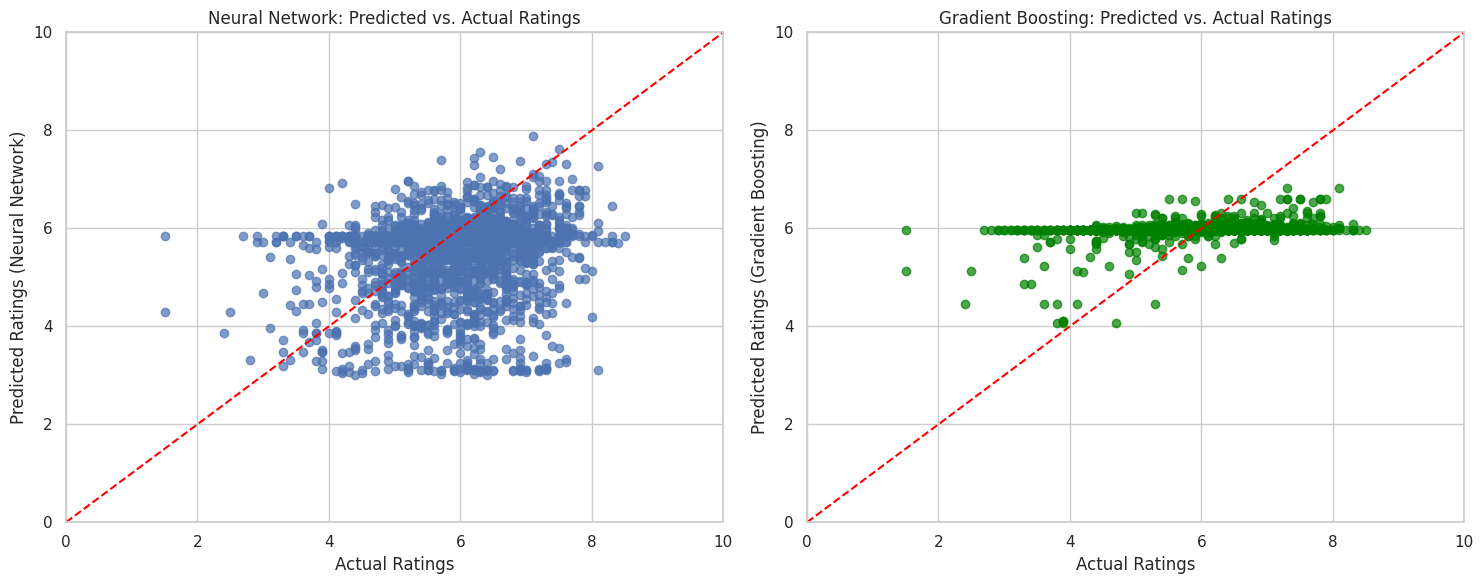

In [91]:
# Plotting style
sns.set(style="whitegrid")

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

nn_predictions = nn_model.predict(X_test_scaled)

# Scatter plot for Neural Network
ax1.scatter(y_test, nn_predictions, alpha=0.7)
ax1.plot([0, 10], [0, 10], color='red', linestyle='--')
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10)
ax1.set_xlabel('Actual Ratings')
ax1.set_ylabel('Predicted Ratings (Neural Network)')
ax1.set_title('Neural Network: Predicted vs. Actual Ratings')
ax1.grid(True)

# Scatter plot for Gradient Boosting
ax2.scatter(y_test, production_y_pred_gb, alpha=0.7, color='green')
ax2.plot([0, 10], [0, 10], color='red', linestyle='--')
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 10)
ax2.set_xlabel('Actual Ratings')
ax2.set_ylabel('Predicted Ratings (Gradient Boosting)')
ax2.set_title('Gradient Boosting: Predicted vs. Actual Ratings')
ax2.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [92]:
# Calculate feature importance from the trained Gradient Boosting model
production_feature_importance = production_gb_model.feature_importances_

# Get the names of production companies
production_company_names = mlb.classes_

# Create a DataFrame to display feature importance
production_importance_df = pd.DataFrame({
    'Production Company': production_company_names,
    'Feature Importance': production_feature_importance
})

# Sort the DataFrame by feature importance
production_importance_df = production_importance_df.sort_values(by='Feature Importance', ascending=False)

# Display top production companies that influence vote ratings
print("Top Production Companies Influencing Vote Ratings:")
print(production_importance_df.head(10))


Top Production Companies Influencing Vote Ratings:
                        Production Company  Feature Importance
6884                            The Asylum            0.122278
5437               Pixar Animation Studios            0.044230
6931                     The Global Asylum            0.031557
218                       After Dark Films            0.028468
3238                Hollywood Media Bridge            0.028246
1958                       Dimension Films            0.026258
986   Boll Kino Beteiligungs GmbH & Co. KG            0.024981
563                            Asylum  The            0.023251
5925                           Rogue State            0.017097
1738                 Crystal Sky Worldwide            0.015324


<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='Feature Importance', ylabel='Production Company'>

Text(0.5, 0, 'Feature Importance')

Text(0, 0.5, 'Production Company')

Text(0.5, 1.0, 'Top Production Companies Influencing Vote Ratings')

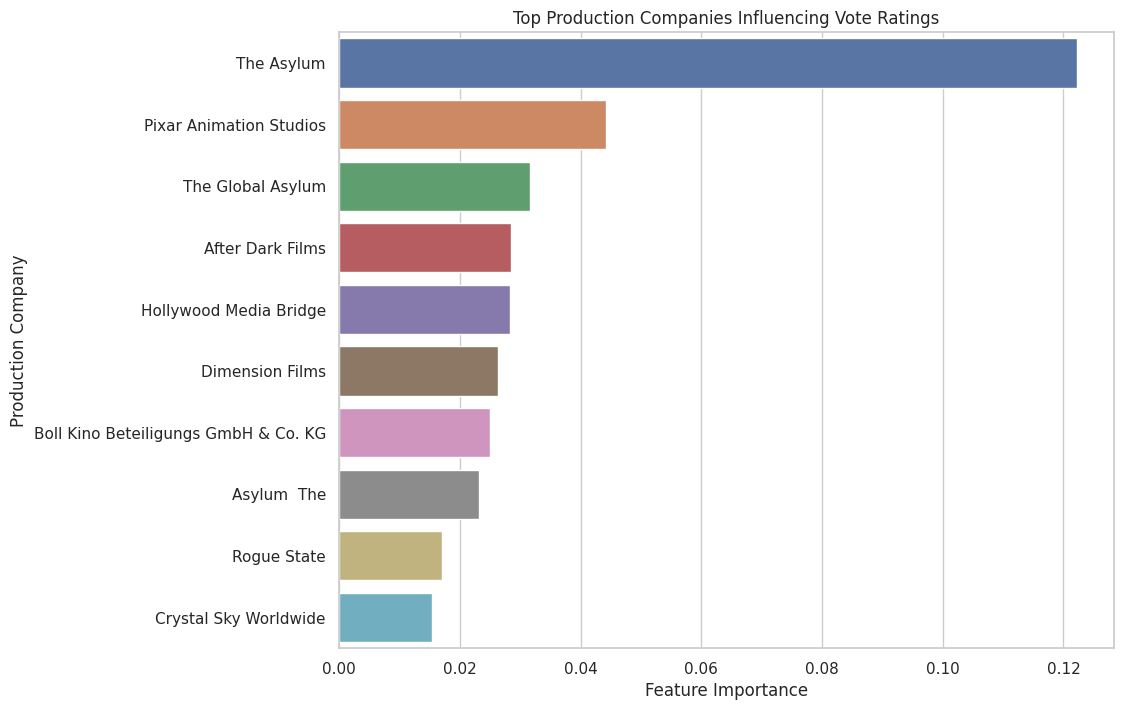

In [93]:
# Create a bar plot to visualize production company importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Feature Importance', y='Production Company', data=production_importance_df.head(10))
plt.xlabel('Feature Importance')
plt.ylabel('Production Company')
plt.title('Top Production Companies Influencing Vote Ratings')
plt.show()

In [94]:
import warnings
warnings. filterwarnings('ignore')

features = ['cast', 'director', 'vote_average']
data = df[features]

unique_cast = list(set('|'.join(data['cast']).split('|')))
unique_directors = list(set(data['director']))

# Create dictionaries to map cast names and directors to numerical indices
cast_to_index = {cast: index for index, cast in enumerate(unique_cast)}
director_to_index = {director: index for index, director in enumerate(unique_directors)}

# Map cast names and directors to indices using .loc
data['cast_indices'] = data['cast'].apply(lambda x: [cast_to_index[cast] for cast in x.split('|')])
data['director_index'] = data['director'].apply(lambda x: director_to_index[x])


# Calculate the average cast index for each movie
data['average_cast_index'] = data['cast_indices'].apply(lambda x: np.mean(x))

In [95]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=23)

# Standardize features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_data[['average_cast_index', 'director_index']])
X_test_scaled = scaler.transform(test_data[['average_cast_index', 'director_index']])
y_train = train_data['vote_average']
y_test = test_data['vote_average']

In [96]:
# Train and evaluate GradientBoostingRegressor for Combined Influence
combined_gb_model = GradientBoostingRegressor(n_estimators=100, random_state=32)
combined_gb_model.fit(X_train_scaled, y_train)
combined_y_pred_gb = combined_gb_model.predict(X_test_scaled)
combined_mse_gb = mean_squared_error(y_test, combined_y_pred_gb)
print("Combined Influence Mean Squared Error (Gradient Boosting):", combined_mse_gb)


GradientBoostingRegressor(random_state=32)

Combined Influence Mean Squared Error (Gradient Boosting): 0.8667661504260542


In [97]:
# Build a simple neural network for Combined Influence
nn_combined_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

nn_combined_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the neural network
nn_combined_model.fit(X_train_scaled, y_train, epochs=20, batch_size=16, validation_split=0.2)

# Evaluate the neural network
nn_combined_mse = nn_combined_model.evaluate(X_test_scaled, y_test)
print("Combined Influence Mean Squared Error (Neural Network):", nn_combined_mse)


Epoch 1/20
429/429 [==============================] - 1s 2ms/step - loss: 4.3709 - val_loss: 1.0511
Epoch 2/20
429/429 [==============================] - 1s 1ms/step - loss: 1.2865 - val_loss: 0.8965
Epoch 3/20
429/429 [==============================] - 1s 2ms/step - loss: 1.2204 - val_loss: 0.8982
Epoch 4/20
429/429 [==============================] - 1s 2ms/step - loss: 1.1931 - val_loss: 0.9308
Epoch 5/20
429/429 [==============================] - 1s 2ms/step - loss: 1.1899 - val_loss: 0.8954
Epoch 6/20
429/429 [==============================] - 1s 2ms/step - loss: 1.1590 - val_loss: 0.9153
Epoch 7/20
429/429 [==============================] - 1s 2ms/step - loss: 1.1495 - val_loss: 0.9401
Epoch 8/20
429/429 [==============================] - 1s 1ms/step - loss: 1.1540 - val_loss: 0.8961
Epoch 9/20
429/429 [==============================] - 1s 2ms/step - loss: 1.1500 - val_loss: 0.9327
Epoch 10/20
429/429 [==============================] - 1s 2ms/step - loss: 1.1216 - val_loss: 0.8947

68/68 [==============================] - 0s 1ms/step - loss: 0.9210
Combined Influence Mean Squared Error (Neural Network): 0.9210135340690613


(0.0, 10.0)

(0.0, 10.0)

Text(0.5, 0, 'Actual Ratings')

Text(0, 0.5, 'Predicted Ratings (Gradient Boosting)')

Text(0.5, 1.0, 'Gradient Boosting: Combined Influence')

68/68 [==============================] - 0s 1ms/step


(0.0, 10.0)

(0.0, 10.0)

Text(0.5, 0, 'Actual Ratings')

Text(0, 0.5, 'Predicted Ratings (Neural Network)')

Text(0.5, 1.0, 'Neural Network: Combined Influence')

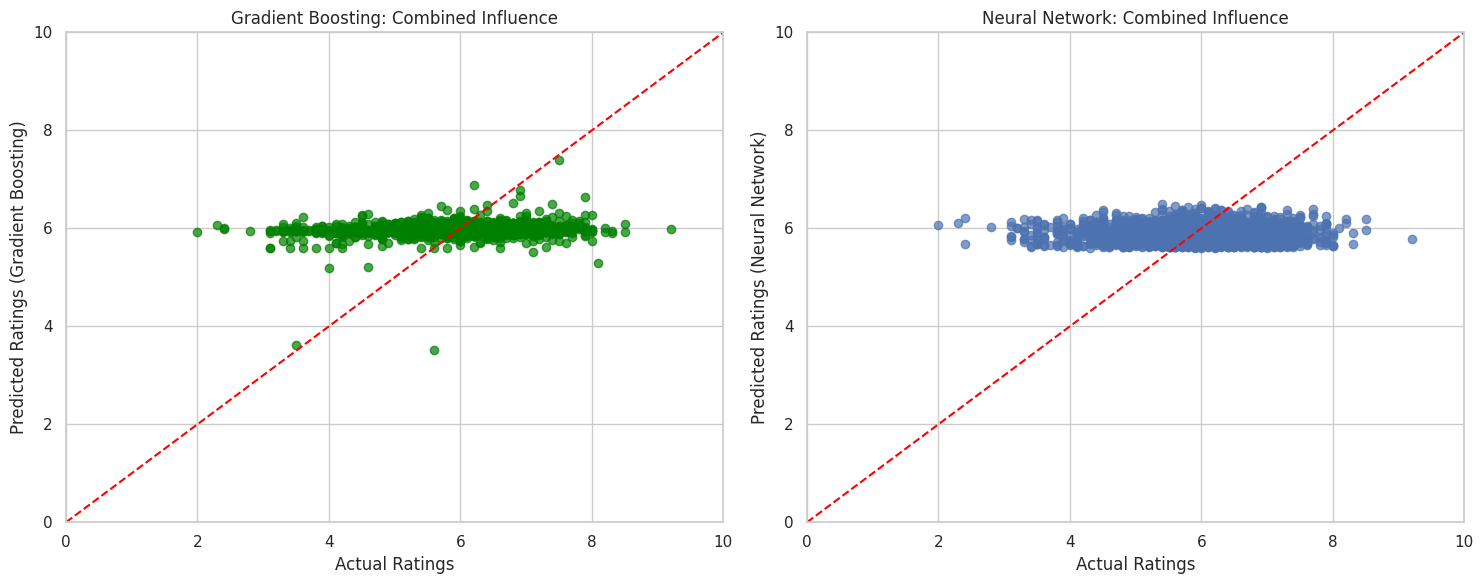

In [98]:
sns.set(style="whitegrid")

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot for Gradient Boosting (Combined Influence)
ax1.scatter(y_test, combined_y_pred_gb, alpha=0.7, color='green')
ax1.plot([0, 10], [0, 10], color='red', linestyle='--')
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10)
ax1.set_xlabel('Actual Ratings')
ax1.set_ylabel('Predicted Ratings (Gradient Boosting)')
ax1.set_title('Gradient Boosting: Combined Influence')
ax1.grid(True)

# Scatter plot for Neural Network (Combined Influence)
nn_combined_predictions = nn_combined_model.predict(X_test_scaled)
ax2.scatter(y_test, nn_combined_predictions, alpha=0.7)
ax2.plot([0, 10], [0, 10], color='red', linestyle='--')
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 10)
ax2.set_xlabel('Actual Ratings')
ax2.set_ylabel('Predicted Ratings (Neural Network)')
ax2.set_title('Neural Network: Combined Influence')
ax2.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [99]:
# Calculate feature importance from the trained Gradient Boosting model for combined influence
combined_feature_importance = combined_gb_model.feature_importances_

# Get the names of unique cast members and directors
unique_cast_names = unique_cast
unique_director_names = unique_directors

# Create a DataFrame to display feature importance
combined_importance_df = pd.DataFrame({
    'Feature': ['Average Cast Index', 'Director Index'],
    'Feature Importance': combined_feature_importance
})

# Display feature importance for cast and director
print("Feature Importance for Combined Influence:")
print(combined_importance_df)


Feature Importance for Combined Influence:
              Feature  Feature Importance
0  Average Cast Index            0.367764
1      Director Index            0.632236


Feature Importance for Combined Influence:
              Feature  Feature Importance
0  Average Cast Index            0.367764
1      Director Index            0.632236


<Figure size 1200x400 with 0 Axes>

<Axes: xlabel='Feature Importance', ylabel='Feature'>

Text(0.5, 0, 'Feature Importance')

Text(0, 0.5, 'Feature')

Text(0.5, 1.0, 'Feature Importance for Combined Influence')

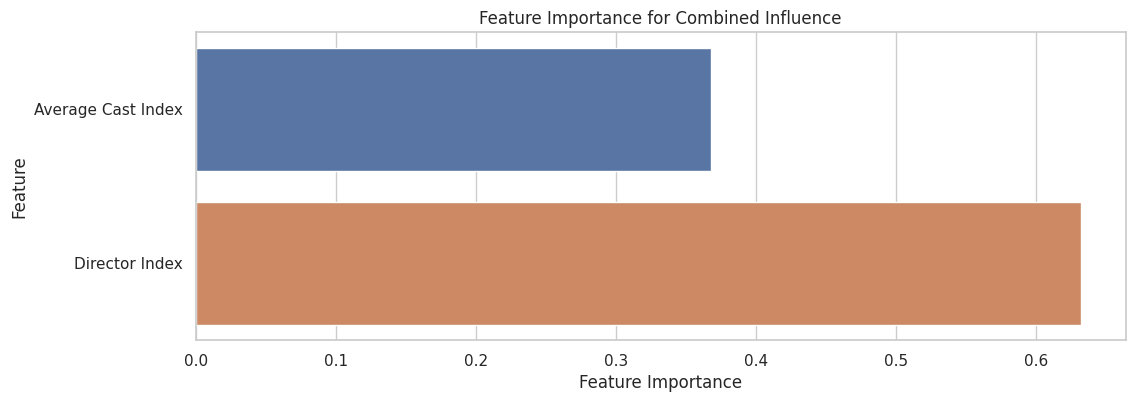

In [100]:
# Calculate feature importance from the trained Gradient Boosting model for combined influence
combined_feature_importance = combined_gb_model.feature_importances_

# Get the names of unique cast members and directors
unique_cast_names = unique_cast
unique_director_names = unique_directors

# Create a DataFrame to display feature importance
combined_importance_df = pd.DataFrame({
    'Feature': ['Average Cast Index', 'Director Index'],
    'Feature Importance': combined_feature_importance
})

# Display feature importance for cast and director
print("Feature Importance for Combined Influence:")
print(combined_importance_df)

# Create a bar plot to visualize the feature importance for combined influence
plt.figure(figsize=(12, 4))
sns.barplot(x='Feature Importance', y='Feature', data=combined_importance_df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Combined Influence')
plt.show()

In [155]:
selected_columns = ['genres', 'vote_average']
df_selected = df[selected_columns]


# Extract unique genres
unique_genres = set()
for genres in df_selected['genres']:
    unique_genres.update(genres.split('|'))

# Create binary columns for each genre
for genre in unique_genres:
    df_selected[genre] = df_selected['genres'].apply(lambda x: int(genre in x))

# Select features and target
features = list(unique_genres)
target = 'vote_average'

In [156]:

X = df_selected[features]
y = df_selected[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [157]:
# Initialize and train a RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict ratings on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

RandomForestRegressor()

Mean Squared Error: 0.7408451472878235


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Importance', ylabel='Genre'>

Text(0.5, 0, 'Importance')

Text(0, 0.5, 'Genre')

Text(0.5, 1.0, 'Genre Importance')

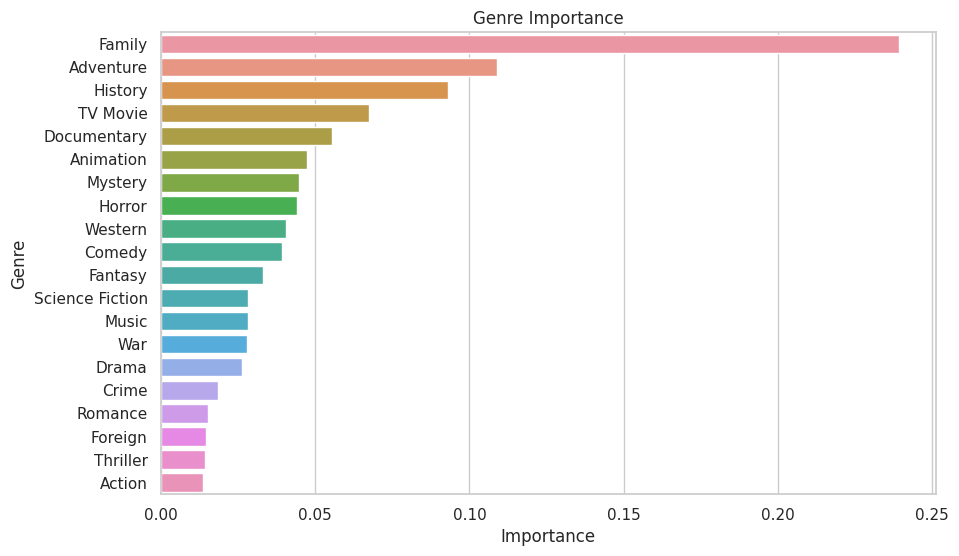

In [154]:
feature_importances = model.feature_importances_

genre_features = list(df_selected.columns.difference(['vote_average', 'genres']))

genre_importance_df = pd.DataFrame({'Genre': genre_features, 'Importance': feature_importances})


genre_importance_df = genre_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize genre importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Genre', data=genre_importance_df)
plt.xlabel('Importance')
plt.ylabel('Genre')
plt.title('Genre Importance')
plt.show()


In [158]:
# Extract unique genres
all_genres = set()
for genres in df['genres']:
    all_genres.update(genres.split('|'))

# Convert genres to binary columns using MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_binary = mlb.fit_transform(df['genres'].apply(lambda x: x.split('|')))
genre_df = pd.DataFrame(genre_binary, columns=mlb.classes_)

# Use genre binary columns as features
X = genre_df
y = df['vote_average']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [161]:
# Define a neural network model with more layers
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Linear activation for regression
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=10, verbose=1)

# Predict movie ratings on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Get feature importance from the trained neural network model
feature_importance = np.abs(model.layers[0].get_weights()[0]).mean(axis=1)

# Get the names of genres
genre_names = mlb.classes_

# Create a DataFrame to display feature importance
genre_importance_df = pd.DataFrame({
    'Genre': genre_names,
    'Feature Importance': feature_importance
})



Epoch 1/20
858/858 [==============================] - 2s 2ms/step - loss: 1.5543
Epoch 2/20
858/858 [==============================] - 1s 1ms/step - loss: 0.7590
Epoch 3/20
858/858 [==============================] - 1s 2ms/step - loss: 0.7458
Epoch 4/20
858/858 [==============================] - 1s 2ms/step - loss: 0.7451
Epoch 5/20
858/858 [==============================] - 1s 2ms/step - loss: 0.7379
Epoch 6/20
858/858 [==============================] - 1s 2ms/step - loss: 0.7192
Epoch 7/20
858/858 [==============================] - 1s 2ms/step - loss: 0.7150
Epoch 8/20
858/858 [==============================] - 2s 2ms/step - loss: 0.7205
Epoch 9/20
858/858 [==============================] - 3s 4ms/step - loss: 0.7157
Epoch 10/20
858/858 [==============================] - 2s 2ms/step - loss: 0.7030
Epoch 11/20
858/858 [==============================] - 2s 2ms/step - loss: 0.7014
Epoch 12/20
858/858 [==============================] - 2s 3ms/step - loss: 0.7042
Epoch 13/20
858/858 [====

68/68 [==============================] - 0s 899us/step
Mean Squared Error: 0.7573553143864377


<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='Feature Importance', ylabel='Genre'>

Text(0.5, 0, 'Feature Importance')

Text(0, 0.5, 'Genre')

Text(0.5, 1.0, 'Top Genres Influencing Vote Ratings')

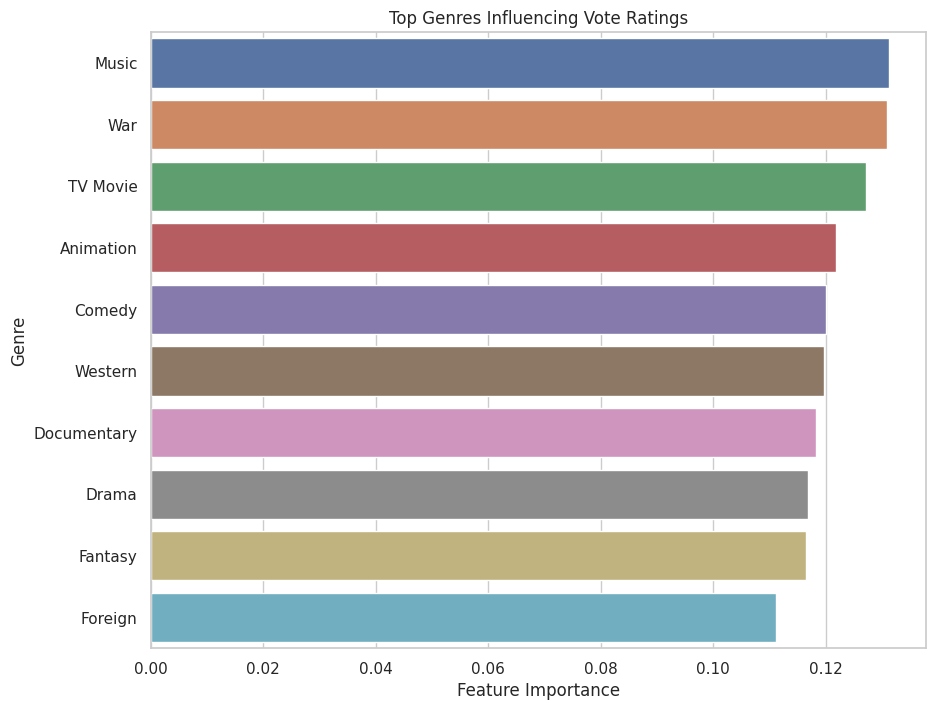

In [160]:
# Sort the DataFrame by feature importance
genre_importance_df = genre_importance_df.sort_values(by='Feature Importance', ascending=False)

# Create a bar plot to visualize genre importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Feature Importance', y='Genre', data=genre_importance_df.head(10))
plt.xlabel('Feature Importance')
plt.ylabel('Genre')
plt.title('Top Genres Influencing Vote Ratings')
plt.show()

In [163]:
selected_columns = ['genres', 'vote_average']
df_selected = df[selected_columns]


# Extract unique genres
unique_genres = set()
for genres in df_selected['genres']:
    unique_genres.update(genres.split('|'))

# Create binary columns for each genre
for genre in unique_genres:
    df_selected[genre] = df_selected['genres'].apply(lambda x: int(genre in x))

# Select features and target
features = list(unique_genres)
target = 'vote_average'

In [164]:

X = df_selected[features]
y = df_selected[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [165]:
start_gb_train = datetime.now()
# Train and evaluate GradientBoostingRegressor for Genre Influence
gb_model = GradientBoostingRegressor(n_estimators=200, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("Genre Influence Mean Squared Error (Gradient Boosting):", mse_gb)

end_gb_train = datetime.now()

# Report the elapsed time measures
print(f"Gradient Boosting Training Time for Genre: {end_gb_train - start_gb_train}")

GradientBoostingRegressor(n_estimators=200, random_state=42)

Genre Influence Mean Squared Error (Gradient Boosting): 0.69570216022874
Gradient Boosting Training Time for Genre: 0:00:00.634786


In [166]:
# Calculate feature importance from the trained Gradient Boosting model
genre_f_importance = gb_model.feature_importances_

# Get the names of production companies
genre_names = mlb.classes_

# Create a DataFrame to display feature importance
genre_importance_df = pd.DataFrame({
    'Genre': genre_names,
    'Feature Importance': genre_f_importance
})

# Sort the DataFrame by feature importance
genre_importance_df = genre_importance_df.sort_values(by='Feature Importance', ascending=False)

# Display top production companies that influence vote ratings
print("Top Genres Influencing Vote Ratings:")
print(genre_importance_df.head(10))


Top Genres Influencing Vote Ratings:
          Genre  Feature Importance
7        Family            0.351892
1     Adventure            0.159960
10      History            0.136052
16     TV Movie            0.071980
5   Documentary            0.054796
19      Western            0.039754
3        Comedy            0.028681
12        Music            0.025439
18          War            0.025125
2     Animation            0.019014


<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='Feature Importance', ylabel='Genre'>

Text(0.5, 0, 'Feature Importance')

Text(0, 0.5, 'Genre')

Text(0.5, 1.0, 'Top Genres Influencing Vote Ratings')

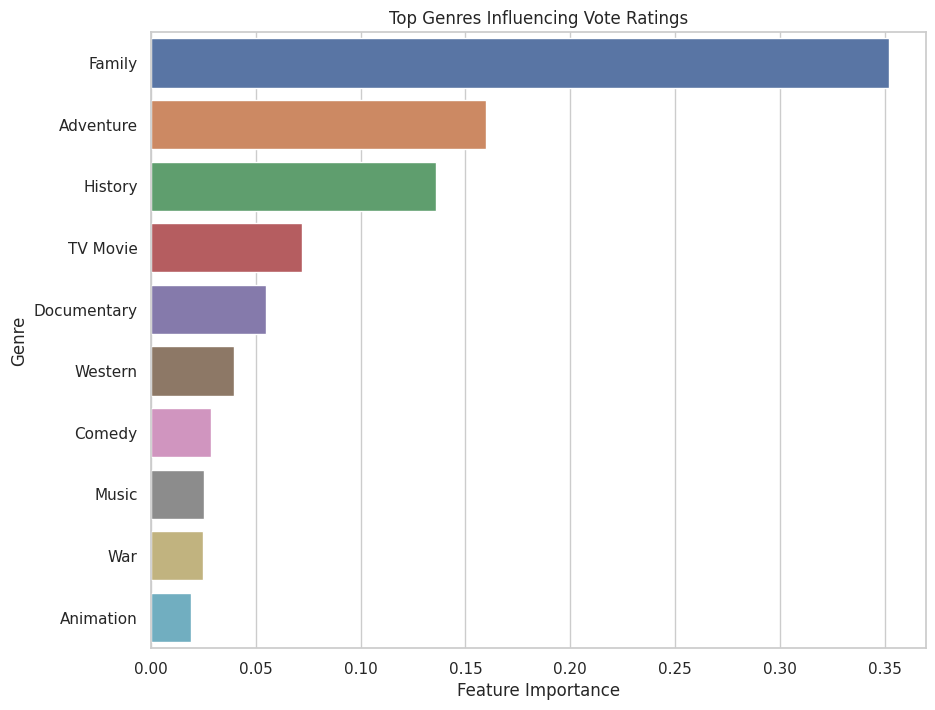

In [167]:
# Sort the DataFrame by feature importance
genre_importance_df = genre_importance_df.sort_values(by='Feature Importance', ascending=False)

# Create a bar plot to visualize genre importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Feature Importance', y='Genre', data=genre_importance_df.head(10))
plt.xlabel('Feature Importance')
plt.ylabel('Genre')
plt.title('Top Genres Influencing Vote Ratings')
plt.show()